# ANALYSIS OF MAFS FROM UKB 50K
### (gVCFs FILTERED BY CH COORDINATES)


Different analyses:

- Select real variants

- Count and plot number of records and real variants

- Analyze variables in last info column and split data

- Calculate VAF

- Analyze and split variants with 2+ ALT

- Analyze INFO column

- Prepare analysis for filtering

In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
### Read VCF files before filtering and after filtering (MAF files) by CH coordinates

# List vcf files before CH filtering in respectives directores
vcf_files = os.listdir('/workspace/datasets/ukbiobank_ch/vcf_50k')
vcf_files = [file for file in vcf_files if '.gvcf' in file]

# List vcf files after CH filtering in respectives directores
vcf_ch_files = os.listdir('/workspace/datasets/ukbiobank_ch/vcf_ch_50k')
vcf_ch_files = [file for file in vcf_ch_files if '.maf' in file]

# Check number of files
print(len(vcf_files))
print(len(vcf_ch_files))

# Check first file (CH filtered)
print()
print(vcf_ch_files[0])
print(vcf_ch_files[1])

49989
49989

4033478_23161_0_0_ch.maf.gz
4034157_23161_0_0_ch.maf.gz


In [98]:
### Open MAF files

# Open 1st MAF file

maf = pd.read_csv('/workspace/datasets/ukbiobank_ch/vcf_ch_50k/' + vcf_ch_files[0], sep= '\t')
maf.iloc[35:45,]

,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_5336357_0230743959
35,1,1804382,1804382,.,C,<NON_REF>,.,.,END=1804405,GT:DP:GQ:MIN_DP:PL,"0/0:15:21:9:0,21,315"
36,1,1804406,1804406,.,C,<NON_REF>,.,.,END=1804601,GT:DP:GQ:MIN_DP:PL,"0/0:38:63:23:0,63,769"
37,1,1804602,1804602,.,G,<NON_REF>,.,.,END=1804681,GT:DP:GQ:MIN_DP:PL,"0/0:18:21:9:0,21,315"
38,1,1806375,1806375,.,T,<NON_REF>,.,.,END=1806441,GT:DP:GQ:MIN_DP:PL,"0/0:17:42:15:0,42,630"
39,1,1806442,1806442,.,G,<NON_REF>,.,.,END=1806455,GT:DP:GQ:MIN_DP:PL,"0/0:27:72:25:0,72,1007"
40,1,1806456,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:13,14,0:27:99:0|1:1806456_G_A:543,0,1150,5..."
41,1,1806457,1806457,.,G,<NON_REF>,.,.,END=1806460,GT:DP:GQ:MIN_DP:PL,"0/0:29:81:29:0,81,1215"
42,1,1806461,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:15,15,0:30:99:0|1:1806456_G_A:575,0,1147,6..."
43,1,1806462,1806462,.,C,<NON_REF>,.,.,END=1806564,GT:DP:GQ:MIN_DP:PL,"0/0:48:63:25:0,63,945"
44,1,1806565,1806565,.,A,<NON_REF>,.,.,END=1806638,GT:DP:GQ:MIN_DP:PL,"0/0:17:30:11:0,30,450"


In [13]:
# Open 2nd MAF file

maf2 = pd.read_csv('/workspace/datasets/ukbiobank_ch/vcf_ch_50k/' + vcf_ch_files[1], sep= '\t')
maf2.iloc[250:260,]

,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_1264514_0230794119
250,1,179117587,179117587,.,T,<NON_REF>,.,.,END=179117616,GT:DP:GQ:MIN_DP:PL,"0/0:18:30:13:0,30,450"
251,1,179118487,179118487,.,G,<NON_REF>,.,.,END=179118551,GT:DP:GQ:MIN_DP:PL,"0/0:15:27:12:0,27,405"
252,1,179118552,179118552,.,G,<NON_REF>,.,.,END=179118798,GT:DP:GQ:MIN_DP:PL,"0/0:82:63:22:0,63,945"
253,1,179118799,179118799,rs2171959,T,"C,<NON_REF>",440.77,.,BaseQRankSum=-4.006;DB;DP=43;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:25,18,0:43:99:469,0,800,544,854,1398:2,23,..."
254,1,179118800,179118800,.,G,<NON_REF>,.,.,END=179118836,GT:DP:GQ:MIN_DP:PL,"0/0:29:60:25:0,60,900"
255,1,179118837,179118837,.,A,<NON_REF>,.,.,END=179118864,GT:DP:GQ:MIN_DP:PL,"0/0:20:34:16:0,34,585"
256,1,179120090,179120090,.,T,<NON_REF>,.,.,END=179120095,GT:DP:GQ:MIN_DP:PL,"0/0:7:12:5:0,12,180"
257,1,179120096,179120096,.,T,<NON_REF>,.,.,END=179120104,GT:DP:GQ:MIN_DP:PL,"0/0:9:21:7:0,21,260"
258,1,179120105,179120105,.,A,<NON_REF>,.,.,END=179120105,GT:DP:GQ:MIN_DP:PL,"0/0:9:0:9:0,0,277"
259,1,179120106,179120106,.,A,<NON_REF>,.,.,END=179120113,GT:DP:GQ:MIN_DP:PL,"0/0:9:21:9:0,21,315"


In [14]:
### Select only rows with real variants from MAFs

# Select only rows with "rs" from 1st MAF

maf_rs = maf[maf["ID"].str.startswith("rs")]
maf_rs

,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_5336357_0230743959
40,1,1806456,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:13,14,0:27:99:0|1:1806456_G_A:543,0,1150,5..."
42,1,1806461,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:15,15,0:30:99:0|1:1806456_G_A:575,0,1147,6..."
88,1,43339569,43339569,rs16830693,A,"G,<NON_REF>",881.77,.,BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:14,27,0:41:99:910,0,459,952,541,1493:5,9,6,21"
121,1,43346404,43346404,rs1760670,G,"A,<NON_REF>",232.77,.,BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:11,8,0:19:99:261,0,437,294,461,755:11,0,8,0"
131,1,43349193,43349193,rs839995,T,"C,<NON_REF>",190.77,.,BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:11,6,0:17:99:219,0,341,252,360,611:9,2,5,1"
...,...,...,...,...,...,...,...,...,...,...,...
13049,X,124066463,124066463,rs34397445,AT,"A,<NON_REF>",358.73,.,BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:8,10,0:18:99:0|1:124066457_GT_G:396,0,501,..."
13062,X,124068468,124068468,rs113697794,C,"CTATA,<NON_REF>",76.73,.,BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:4,3,0:7:99:114,0,237,126,246,372:4,0,3,0"
13079,X,124071128,124071128,rs759815507,CT,"C,CTT,<NON_REF>",3.39,.,BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:15,4,4,0:23:20:38,0,363,20,261,381,97,362,..."
13292,X,124392181,124392181,rs2076165,T,"C,<NON_REF>",426.77,.,BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:28,15,0:43:99:455,0,826,539,871,1410:13,15..."


In [15]:
### Select only rows with real variants from MAFs: GOOD
# Select only variants NOT having "<NON_REF>" in "ALT"
maf_real = maf[~maf["ALT"].str.startswith("<NON_REF>")]
print("Number of variants without <NON_REF>: " + str(len(maf_real)))

# Select only variants NOT having "END=" in "INFO"
df2 = maf[~maf["INFO"].str.startswith("END=")]
print()
print("Number of variants without 'END=': " + str(len(df2)))

# Check from these variants the ones NOT annotated with rs
df3 = maf_real[~maf_real["ID"].str.startswith("rs")]
print()
print("Number of variants without <NON_REF> and NOT rs: " + str(len(df3)))
df3.head()

Number of variants without <NON_REF>: 414

Number of variants without 'END=': 414

Number of variants without <NON_REF> and NOT rs: 30


,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_5336357_0230743959
465,1,204532210,204532210,.,A,"G,<NON_REF>",0,.,BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,GT:AD:DP:GQ:PL:SB,"0/0:15,2,0:17:2:0,2,477,45,483,526:11,4,1,1"
965,2,99707699,99707699,.,CT,"C,CTT,<NON_REF>",0.01,.,BaseQRankSum=0.306;DP=17;ExcessHet=3.0103;MLEA...,GT:AD:DP:GQ:PL:SB,"0/2:9,2,2,0:13:12:12,13,230,0,171,213,46,229,2..."
1126,2,100106464,100106464,.,T,"C,<NON_REF>",0,.,BaseQRankSum=-2.244;DP=37;ExcessHet=3.0103;MLE...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/0:34,2,0:36:62:1|0:100106446_A_G:0,62,1357,1..."
1805,3,71197805,71197805,.,G,"T,<NON_REF>",19.81,.,BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,GT:AD:DP:GQ:PL:SB,"0/1:9,2,0:11:48:48,0,345,75,351,426:9,0,2,0"
2680,5,112843212,112843212,.,C,"T,<NON_REF>",0,.,BaseQRankSum=-1.289;DP=21;ExcessHet=3.0103;MLE...,GT:AD:DP:GQ:PL:SB,"0/0:20,1,0:21:38:0,38,786,60,789,811:12,8,0,1"


In [16]:
# Select only variants NOT having "<NON_REF>" in "ALT" from 2nd MAF

maf2_real = maf2[~ maf2["ALT"].str.startswith("<NON_REF>")]
maf2_real.head()

,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_1264514_0230794119
132,1,43346404,43346404,rs1760670,G,"A,<NON_REF>",1683.77,.,"DB;DP=46;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",GT:AD:DP:GQ:PL:SB,"1/1:0,46,0:46:99:1712,138,0,1712,138,1712:0,0,..."
137,1,43349193,43349193,rs839995,T,"C,<NON_REF>",1522.77,.,"DB;DP=36;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",GT:AD:DP:GQ:PL:SB,"1/1:0,36,0:36:99:1551,108,0,1551,108,1551:0,0,..."
186,1,114714048,114714048,rs969273,G,"A,<NON_REF>",76.77,.,BaseQRankSum=-3.087;DB;DP=12;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:8,4,0:12:99:105,0,309,129,321,450:0,8,0,4"
202,1,179109038,179109038,rs774330058,A,"C,<NON_REF>",0.20,.,BaseQRankSum=-3.199;DB;DP=75;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:65,10,0:75:15:15,0,2472,211,2503,2713:7,58..."
253,1,179118799,179118799,rs2171959,T,"C,<NON_REF>",440.77,.,BaseQRankSum=-4.006;DB;DP=43;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:25,18,0:43:99:469,0,800,544,854,1398:2,23,..."


In [17]:
maf_real.head(50)

,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_5336357_0230743959
40,1,1806456,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:13,14,0:27:99:0|1:1806456_G_A:543,0,1150,5..."
42,1,1806461,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:15,15,0:30:99:0|1:1806456_G_A:575,0,1147,6..."
88,1,43339569,43339569,rs16830693,A,"G,<NON_REF>",881.77,.,BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:14,27,0:41:99:910,0,459,952,541,1493:5,9,6,21"
121,1,43346404,43346404,rs1760670,G,"A,<NON_REF>",232.77,.,BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:11,8,0:19:99:261,0,437,294,461,755:11,0,8,0"
131,1,43349193,43349193,rs839995,T,"C,<NON_REF>",190.77,.,BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:11,6,0:17:99:219,0,341,252,360,611:9,2,5,1"
284,1,179117284,179117284,rs779694937,TA,"T,<NON_REF>",0.04,.,BaseQRankSum=-0.619;DB;DP=14;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:11,2,0:13:17:17,0,267,50,273,323:11,0,2,0"
413,1,204525308,204525308,rs3789051,C,"T,<NON_REF>",880.77,.,"DB;DP=25;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",GT:AD:DP:GQ:PL:SB,"1/1:0,25,0:25:75:909,75,0,909,75,909:0,0,22,3"
445,1,204526467,204526467,rs200388119,G,"GTT,<NON_REF>",97.75,.,BaseQRankSum=-0.876;DB;DP=15;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:2,5,0:7:23:135,0,23,140,38,179:0,2,0,5"
465,1,204532210,204532210,.,A,"G,<NON_REF>",0,.,BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,GT:AD:DP:GQ:PL:SB,"0/0:15,2,0:17:2:0,2,477,45,483,526:11,4,1,1"
508,1,204542972,204542972,rs4252717,T,"C,<NON_REF>",327.78,.,"DB;DP=9;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,...",GT:AD:DP:GQ:PL:SB,"1/1:0,9,0:9:27:356,27,0,356,27,356:0,0,1,8"


In [9]:
### Save dataframe

#maf_real.drop('POS2', axis=1).to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/analysis_ch_genes_vep_202104/results/ch_variants_nonref_maf1.txt',
#                 sep="\t", index = False)
#maf2_real.drop('POS2', axis=1).to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/analysis_ch_genes_vep_202104/results/ch_variants_nonref_maf2.txt',
#                 sep="\t", index = False)

----------------------

# CONCLUSION

### Take variants with "ALT" different from "NON_REF"

----------------------



In [10]:
#%%script false 

### Check number of variants and rs variants of each patient

# Create empty list
#nvariants_total = []
#nvariants_real = []

# Loop to count total number of variants and number of variants annotated with "rs"
#for i, file in enumerate(vcf_ch_files):
#    maf = pd.read_csv('/workspace/datasets/ukbiobank_ch/vcf_ch_50k/' + file, sep= '\t')
#    nvariants_total.append(len(maf)) 
#    #df1 = maf[~maf["ALT"].str.startswith("<NON_REF>")]
#    maf_real = maf[maf["ID"].str.startswith("rs")]
#    nvariants_real.append(len(maf_real))

In [11]:
#%%script false 

### Create data frame and save

# Create pandas dataframe
# nvariants_df = pd.DataFrame(nvariants_total)
# nvariants_df[1] = nvariants_real
# nvariants_df.columns = ["total_records", "variant_number"]
# nvariants_df

# Save dataframe
# nvariants_df.to_csv('/workspace/datasets/ukbiobank_ch/analysis_50k_202103/results/ukb50k_number_variants_good.tsv',
#                     sep="\t", index = False)

In [12]:
# %%script false 

### Save results (NOT done)

# total number of variants
# with open('results/ukb50k_number_variants.txt', 'w') as f:
#     for item in nvariants:
#         f.write("%s\n" % item)

# number of "rs" annotated variants        
# with open('results/ukb50k_number_variants_rs.txt', 'w') as f:
#     for item in nvariants_rs:
#         f.write("%s\n" % item)

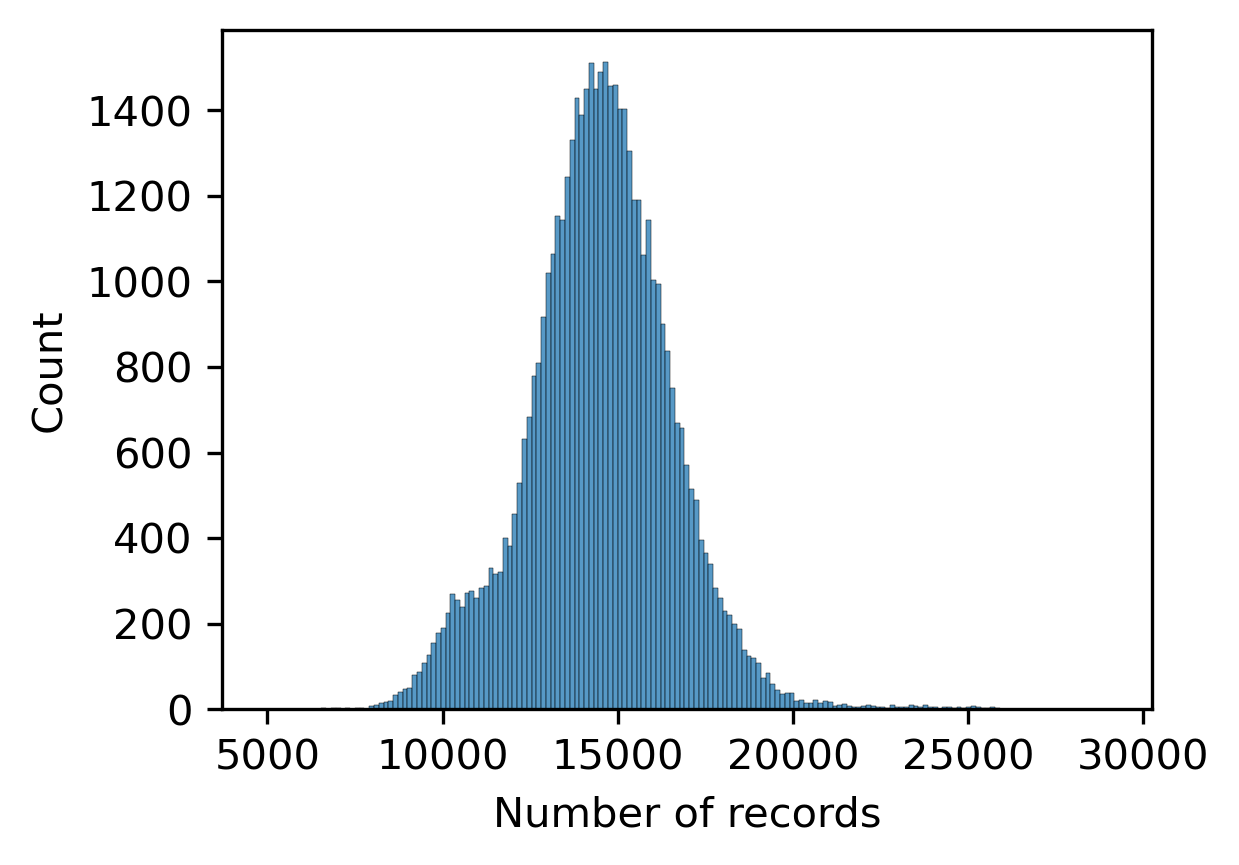

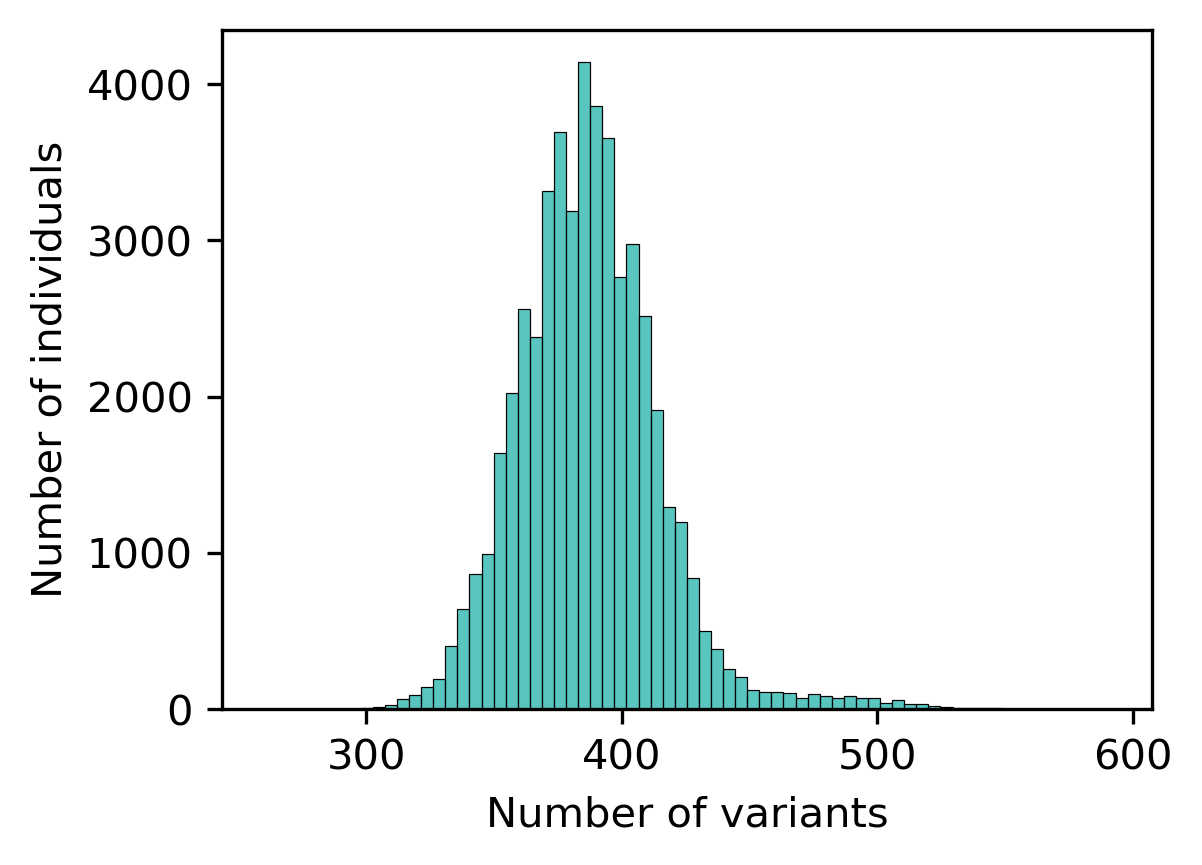

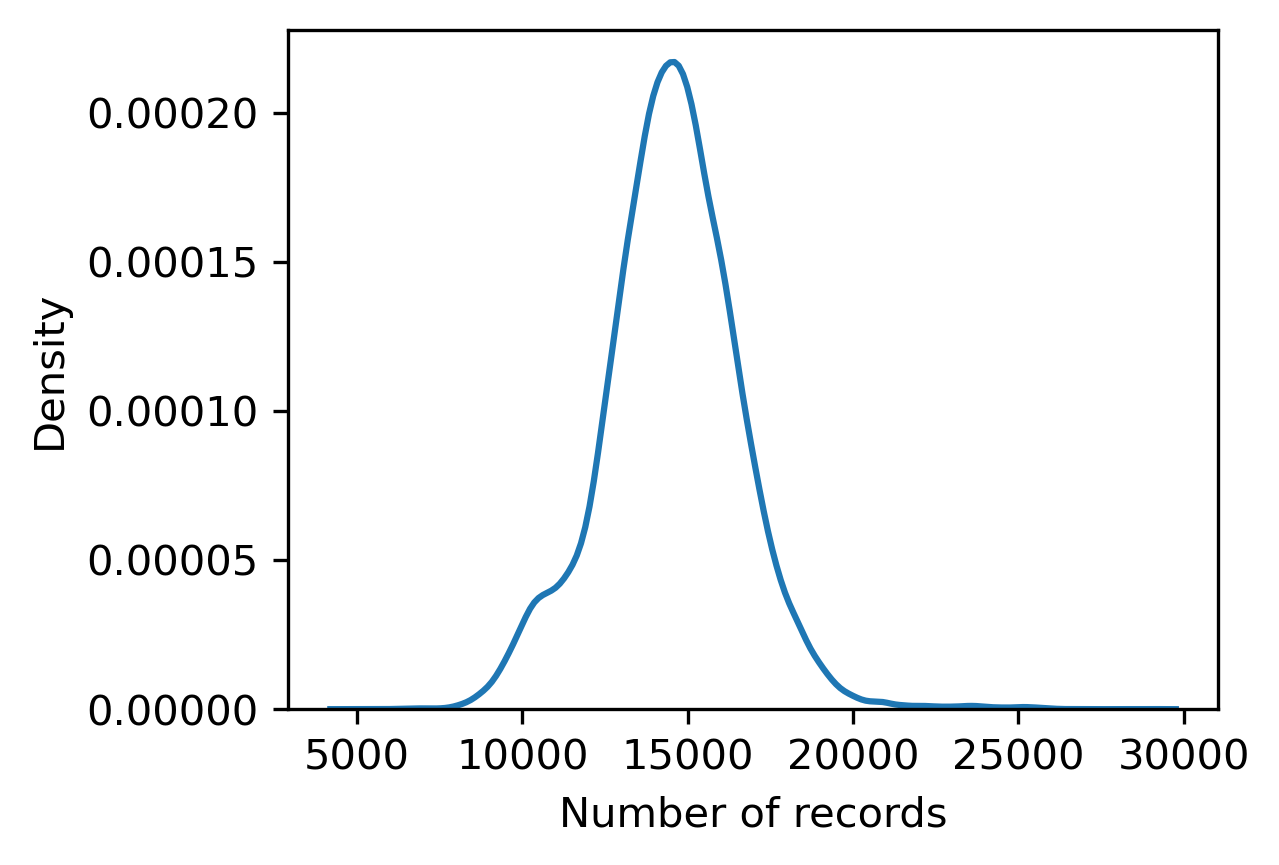

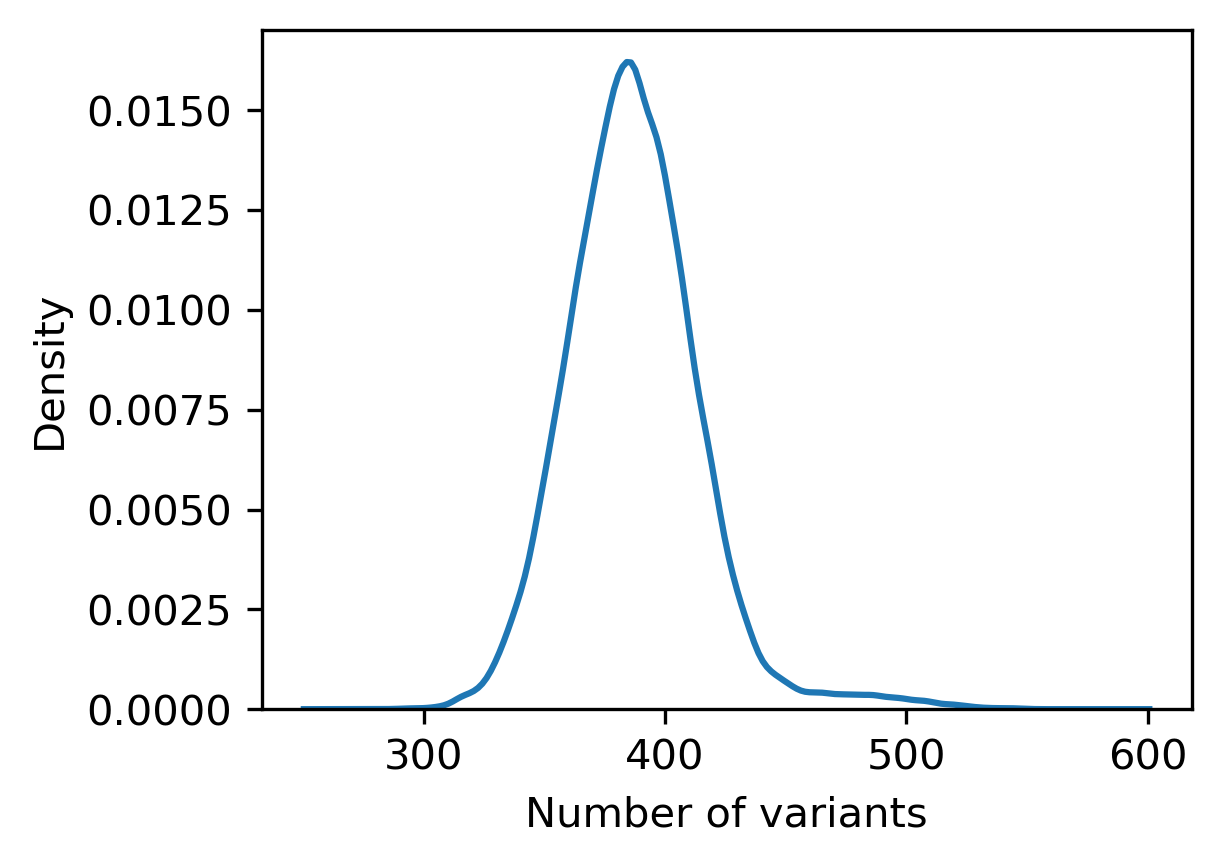

In [34]:
### Histograms/Density number of variants in each patient

## Open data
nvariants_50k = pd.read_csv('/workspace/datasets/ukbiobank_ch/analysis_50k_202103/results/ukb50k_number_variants_good.tsv', sep= '\t')

## Draw histograms    
plt.rcParams["figure.figsize"] = (4,3)
# Histogram total number of variants
graph = sns.histplot(nvariants_50k["total_records"])
graph.set(xlabel="Number of records")
plt.show()

# Histogram number of "rs" annotated variants
graph = sns.histplot(nvariants_50k["variant_number"], bins=70, color="lightseagreen")
graph.set(xlabel="Number of variants", ylabel="Number of individuals")
plt.show()

## Draw density plots    
# Histogram total number of variants
graph = sns.kdeplot(nvariants_50k["total_records"])
graph.set(xlabel="Number of records")
plt.show()

# Histogram number of "rs" annotated variants
graph = sns.kdeplot(nvariants_50k["variant_number"])
graph.set(xlabel="Number of variants")
plt.show()

In [37]:
round(nvariants_50k.describe(),2)

,total_records,variant_number
count,49989.00,49989.00
mean,14493.79,387.27
std,2083.49,28.05
min,4907.00,260.00
25%,13261.00,369.00
50%,14517.00,386.00
75%,15779.00,403.00
max,29042.00,591.00


<AxesSubplot:xlabel='total_records', ylabel='variant_number'>

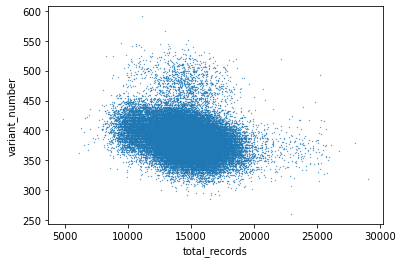

In [14]:
### Scatter plot

nvariants_50k.plot.scatter("total_records", "variant_number", s=0.1)

----------------------

# Take real variants


In [39]:
### Check first MAF

maf_real = maf[~ maf["ALT"].str.startswith("<NON_REF>")]
maf_real

,#CHROM,POS,POS2,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,UKB_5336357_0230743959
40,1,1806456,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:13,14,0:27:99:0|1:1806456_G_A:543,0,1150,5..."
42,1,1806461,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:15,15,0:30:99:0|1:1806456_G_A:575,0,1147,6..."
88,1,43339569,43339569,rs16830693,A,"G,<NON_REF>",881.77,.,BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:14,27,0:41:99:910,0,459,952,541,1493:5,9,6,21"
121,1,43346404,43346404,rs1760670,G,"A,<NON_REF>",232.77,.,BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,GT:AD:DP:GQ:PL:SB,"0/1:11,8,0:19:99:261,0,437,294,461,755:11,0,8,0"
131,1,43349193,43349193,rs839995,T,"C,<NON_REF>",190.77,.,BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:11,6,0:17:99:219,0,341,252,360,611:9,2,5,1"
...,...,...,...,...,...,...,...,...,...,...,...
13049,X,124066463,124066463,rs34397445,AT,"A,<NON_REF>",358.73,.,BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PGT:PID:PL:SB,"0/1:8,10,0:18:99:0|1:124066457_GT_G:396,0,501,..."
13062,X,124068468,124068468,rs113697794,C,"CTATA,<NON_REF>",76.73,.,BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:4,3,0:7:99:114,0,237,126,246,372:4,0,3,0"
13079,X,124071128,124071128,rs759815507,CT,"C,CTT,<NON_REF>",3.39,.,BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:15,4,4,0:23:20:38,0,363,20,261,381,97,362,..."
13292,X,124392181,124392181,rs2076165,T,"C,<NON_REF>",426.77,.,BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...,GT:AD:DP:GQ:PL:SB,"0/1:28,15,0:43:99:455,0,826,539,871,1410:13,15..."


In [40]:
### Split info from last column

# Split column
split_ukbcol = maf_real[maf_real.columns[-1]].str.split(":",expand=True)
split_ukbcol2 = maf2_real[maf2_real.columns[-1]].str.split(":",expand=True)

# Add column names
split_ukbcol.columns = ["GT","AD","DP","GQ","PGT","PID","PL","SB"]
split_ukbcol2.columns = ["GT","AD","DP","GQ","PGT","PID","PL","SB"]

# Show
split_ukbcol

,GT,AD,DP,GQ,PGT,PID,PL,SB
40,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0"
42,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1"
88,0/1,"14,27,0",41,99,"910,0,459,952,541,1493","5,9,6,21",None,None
121,0/1,"11,8,0",19,99,"261,0,437,294,461,755","11,0,8,0",None,None
131,0/1,"11,6,0",17,99,"219,0,341,252,360,611","9,2,5,1",None,None
...,...,...,...,...,...,...,...,...
13049,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10"
13062,0/1,"4,3,0",7,99,"114,0,237,126,246,372","4,0,3,0",None,None
13079,0/1,"15,4,4,0",23,20,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",None,None
13292,0/1,"28,15,0",43,99,"455,0,826,539,871,1410","13,15,7,8",None,None


In [41]:
# Deep copy (TEST)

import copy
split_ukbcol_cp = copy.deepcopy(split_ukbcol)
split_ukbcol_cp

,GT,AD,DP,GQ,PGT,PID,PL,SB
40,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0"
42,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1"
88,0/1,"14,27,0",41,99,"910,0,459,952,541,1493","5,9,6,21",None,None
121,0/1,"11,8,0",19,99,"261,0,437,294,461,755","11,0,8,0",None,None
131,0/1,"11,6,0",17,99,"219,0,341,252,360,611","9,2,5,1",None,None
...,...,...,...,...,...,...,...,...
13049,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10"
13062,0/1,"4,3,0",7,99,"114,0,237,126,246,372","4,0,3,0",None,None
13079,0/1,"15,4,4,0",23,20,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",None,None
13292,0/1,"28,15,0",43,99,"455,0,826,539,871,1410","13,15,7,8",None,None


In [42]:
### Reorder columns 4-7

for i in range(split_ukbcol.shape[0]):
    if split_ukbcol.iloc[i, 6] is None:
        split_ukbcol.iloc[i, 6] = split_ukbcol.iloc[i, 4]
        split_ukbcol.iloc[i, 4] = None
    if split_ukbcol.iloc[i, 7] is None:
        split_ukbcol.iloc[i, 7] = split_ukbcol.iloc[i, 5]
        split_ukbcol.iloc[i, 5] = None
    
split_ukbcol

,GT,AD,DP,GQ,PGT,PID,PL,SB
40,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0"
42,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1"
88,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21"
121,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0"
131,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1"
...,...,...,...,...,...,...,...,...
13049,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10"
13062,0/1,"4,3,0",7,99,None,None,"114,0,237,126,246,372","4,0,3,0"
13079,0/1,"15,4,4,0",23,20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0"
13292,0/1,"28,15,0",43,99,None,None,"455,0,826,539,871,1410","13,15,7,8"


In [43]:
### Join info from last column to the rest of the data frame

# Select columns from original maf and merge with splitted columns (maf 1)
maf_splited = pd.concat([maf_real.iloc[:,[0,1,3,4,5,6,7]],
                         split_ukbcol, 
                         maf_real.iloc[:,8]], axis=1)

# Select columns from original maf and merge with splitted columns (maf 2)
maf_splited2 = pd.concat([maf2_real.iloc[:,[0,1,3,4,5,6,7]],
                         split_ukbcol2, 
                         maf2_real.iloc[:,8]], axis=1)

# Show result maf 1
maf_splited.head(10)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
40,1,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
42,1,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
88,1,43339569,rs16830693,A,"G,<NON_REF>",881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
121,1,43346404,rs1760670,G,"A,<NON_REF>",232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
131,1,43349193,rs839995,T,"C,<NON_REF>",190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
284,1,179117284,rs779694937,TA,"T,<NON_REF>",0.04,.,0/1,"11,2,0",13,17,None,None,"17,0,267,50,273,323","11,0,2,0",BaseQRankSum=-0.619;DB;DP=14;ExcessHet=3.0103;...
413,1,204525308,rs3789051,C,"T,<NON_REF>",880.77,.,1/1,"0,25,0",25,75,None,None,"909,75,0,909,75,909","0,0,22,3","DB;DP=25;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
445,1,204526467,rs200388119,G,"GTT,<NON_REF>",97.75,.,0/1,"2,5,0",7,23,None,None,"135,0,23,140,38,179","0,2,0,5",BaseQRankSum=-0.876;DB;DP=15;ExcessHet=3.0103;...
465,1,204532210,.,A,"G,<NON_REF>",0,.,0/0,"15,2,0",17,2,None,None,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...
508,1,204542972,rs4252717,T,"C,<NON_REF>",327.78,.,1/1,"0,9,0",9,27,None,None,"356,27,0,356,27,356","0,0,1,8","DB;DP=9;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,..."


In [44]:
### Check "GT: Genotype"

# Summary
maf_splited["GT"].value_counts()

0/1    231
1/1    140
0/0     26
0/2      9
1/2      5
3/4      1
0/3      1
2/3      1
Name: GT, dtype: int64

In [45]:
# Check samples with genotype 0/0
maf_splited[maf_splited["GT"] == "0/0"].head(10)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
465,1,204532210,.,A,"G,<NON_REF>",0,.,0/0,"15,2,0",17,2,None,None,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...
1108,2,100104793,rs1051574887,G,"A,<NON_REF>",0,.,0/0,"9,0,0",9,27,None,None,"0,27,416,27,416,416","0,9,0,0","DB;DP=12;ExcessHet=3.0103;MLEAC=0,0;MLEAF=0.00..."
1126,2,100106464,.,T,"C,<NON_REF>",0,.,0/0,"34,2,0",36,62,1|0,100106446_A_G,"0,62,1357,105,1363,1406","10,24,1,1",BaseQRankSum=-2.244;DP=37;ExcessHet=3.0103;MLE...
1676,3,70971977,rs753205403,GA,"G,GAA,<NON_REF>",0,.,0/0,"27,3,5,0",35,1,None,None,"0,24,793,1,606,682,101,759,697,831","23,4,6,2",BaseQRankSum=-0.886;DB;DP=38;ExcessHet=3.0103;...
1879,3,71583426,rs61675522,G,"GT,<NON_REF>",0,.,0/0,"16,2,0",18,0,None,None,"0,0,390,48,396,444","16,0,2,0",BaseQRankSum=-1.554;DB;DP=21;ExcessHet=3.0103;...
2680,5,112843212,.,C,"T,<NON_REF>",0,.,0/0,"20,1,0",21,38,None,None,"0,38,786,60,789,811","12,8,0,1",BaseQRankSum=-1.289;DP=21;ExcessHet=3.0103;MLE...
2987,7,102250062,.,G,"GAA,<NON_REF>",0,.,0/0,"26,3,0",29,5,None,None,"0,5,827,78,836,909","11,15,2,1",BaseQRankSum=-0.290;DP=44;ExcessHet=3.0103;MLE...
3406,7,148846605,.,A,"G,<NON_REF>",0,.,0/0,"36,2,0",38,68,None,None,"0,68,1301,111,1307,1350","7,29,1,1",BaseQRankSum=-1.777;DP=38;ExcessHet=3.0103;MLE...
4002,7,152238828,.,T,"C,<NON_REF>",0,.,0/0,"17,2,0",19,8,None,None,"0,8,563,51,569,612","3,14,1,1",BaseQRankSum=-1.719;DP=19;ExcessHet=3.0103;MLE...
4119,7,152273692,rs201753635,G,"A,<NON_REF>",0,.,0/0,"114,12,0",126,35,None,None,"0,35,3020,342,3056,3363","79,35,10,2",BaseQRankSum=2.542;DB;DP=126;ExcessHet=3.0103;...


In [46]:
### Check "AD: Allelic depths for the ref and alt alleles in the order listed"

# Number of records
#print(maf_splited["AD"].str.count(",") + 1)

# Summary number of records
#print()
print("Summary number of records:")
print((maf_splited["AD"].str.count(",") + 1).value_counts())

# Maximin and minimum Number of records
#print(max(maf_splited["AD"].str.count(",") + 1))
#print(min(maf_splited["AD"].str.count(",") + 1))

# Example of AD with 4 records
maf_splited[maf_splited["AD"].str.count(",") + 1 == 4].head(10)

Summary number of records:
3    375
4     32
5      4
6      3
Name: AD, dtype: int64


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
965,2,99707699,.,CT,"C,CTT,<NON_REF>",0.01,.,0/2,"9,2,2,0",13,12,None,None,"12,13,230,0,171,213,46,229,214,265","0,9,0,4",BaseQRankSum=0.306;DP=17;ExcessHet=3.0103;MLEA...
1232,2,197400449,rs770725816,T,"A,TA,<NON_REF>",308.73,.,0/1,"15,16,0,0",31,99,None,None,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...
1646,3,70959190,rs112773801,G,"GT,GTT,<NON_REF>",3.96,.,0/2,"9,2,2,0",13,3,None,None,"37,3,199,0,185,292,57,226,269,307","9,0,4,0",BaseQRankSum=0.068;DB;DP=16;ExcessHet=3.0103;M...
1676,3,70971977,rs753205403,GA,"G,GAA,<NON_REF>",0,.,0/0,"27,3,5,0",35,1,None,None,"0,24,793,1,606,682,101,759,697,831","23,4,6,2",BaseQRankSum=-0.886;DB;DP=38;ExcessHet=3.0103;...
2252,4,105241952,rs201078423,TTC,"*,T,<NON_REF>",154.73,.,0/2,"7,5,8,0",20,99,None,None,"192,111,330,0,106,127,201,321,171,390","1,6,6,7",BaseQRankSum=0.960;DB;DP=24;ExcessHet=3.0103;M...
2253,4,105241953,rs368755200,TC,"*,T,<NON_REF>",443.73,.,1/2,"1,13,5,0",19,85,None,None,"481,85,100,290,0,265,450,125,306,464","0,1,7,11",BaseQRankSum=1.288;DB;DP=24;ExcessHet=3.0103;M...
2254,4,105241954,rs2866777,C,"*,T,<NON_REF>",876.77,.,1/1,"0,18,1,0",19,31,None,None,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...."
3050,7,102255385,rs111309124,C,"CA,CAA,<NON_REF>",933.73,.,0/1,"19,45,4,0",68,99,None,None,"971,0,242,886,333,1484,1014,421,1423,1504","9,10,28,21",BaseQRankSum=-0.208;DB;DP=79;ExcessHet=3.0103;...
3069,7,102257306,rs35391223,C,"CT,CTT,<NON_REF>",213.73,.,0/1,"19,12,3,0",34,99,None,None,"251,0,405,192,417,804,292,479,760,820","12,7,8,7",BaseQRankSum=1.399;DB;DP=35;ExcessHet=3.0103;M...
3078,7,102257898,.,CT,"C,CTT,<NON_REF>",21.76,.,0/2,"31,8,10,0",49,21,None,None,"59,21,808,0,527,716,185,784,728,953","20,11,15,3",BaseQRankSum=0.533;DP=58;ExcessHet=3.0103;MLEA...


269
2
22.0


[Text(0.5, 0, 'DP (combined depth across samples)')]

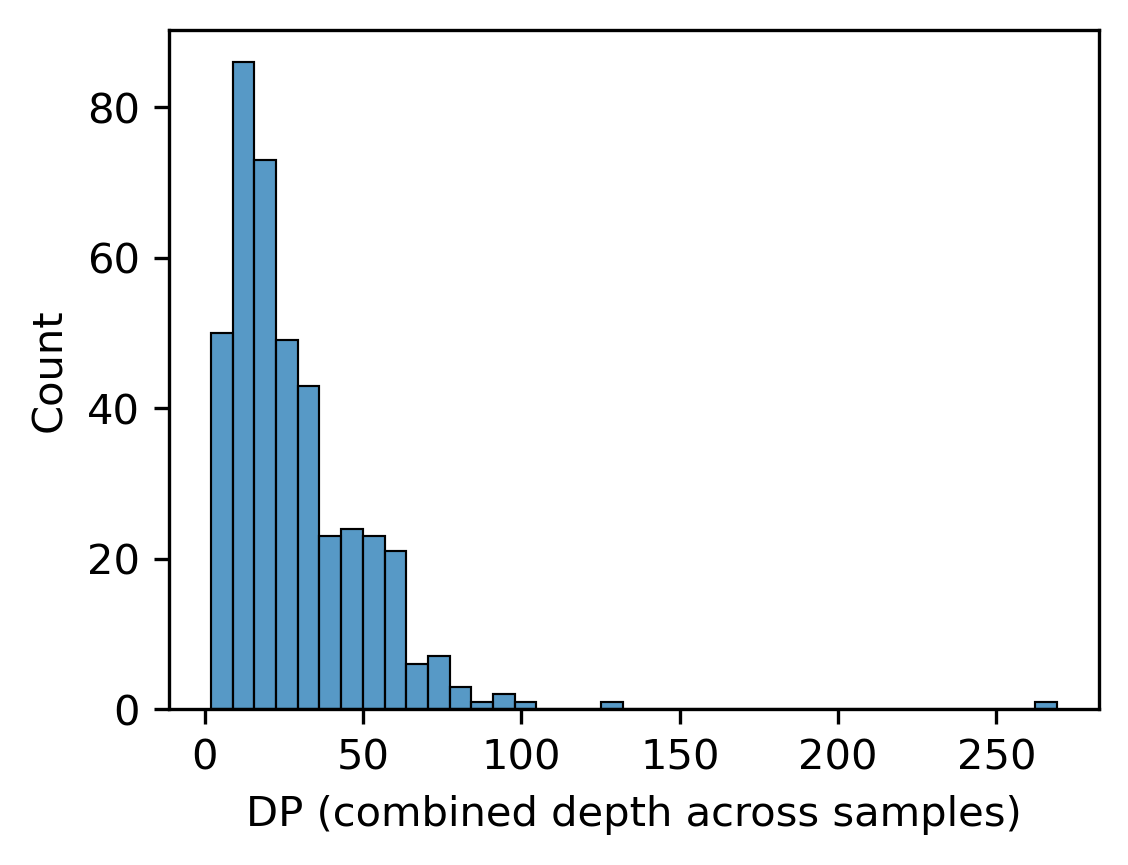

In [47]:
### Check "DP : combined depth across samples"

# Minimum / Maximum DP
print(max(maf_splited["DP"].astype(int)))
print(min(maf_splited["DP"].astype(int)))
print(np.median(maf_splited["DP"].astype(int)))

# Histogram
g = sns.histplot(maf_splited["DP"].astype(int))
g.set(xlabel="DP (combined depth across samples)")
#plt.show()
#maf_splited["DP"].astype(int).hist(bins=50, grid=False, xrot=90) # alternative code

In [48]:
# Check sample with max or min depth
maf_splited[maf_splited["DP"].astype(int).isin([2,269])]


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
4106,7,152265091,rs62478356,T,"A,<NON_REF>",1501.77,.,0/1,"189,80,0",269,99,None,None,"1530,0,5041,2097,5281,7378","99,90,42,38",BaseQRankSum=0.923;DB;DP=269;ExcessHet=3.0103;...
6610,11,108325249,rs878892909,GT,"G,<NON_REF>",9.09,.,1/1,"0,2,0",2,6,None,None,"44,6,0,44,6,44","0,0,1,1","DB;DP=3;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,..."
9028,17,7673125,rs71928208,C,"CAA,<NON_REF>",24.54,.,1/1,"0,2,0",2,6,None,None,"60,6,0,60,6,60","0,0,2,0","DB;DP=3;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,..."


99
0


[Text(0.5, 0, 'GQ (conditional genotype quality)')]

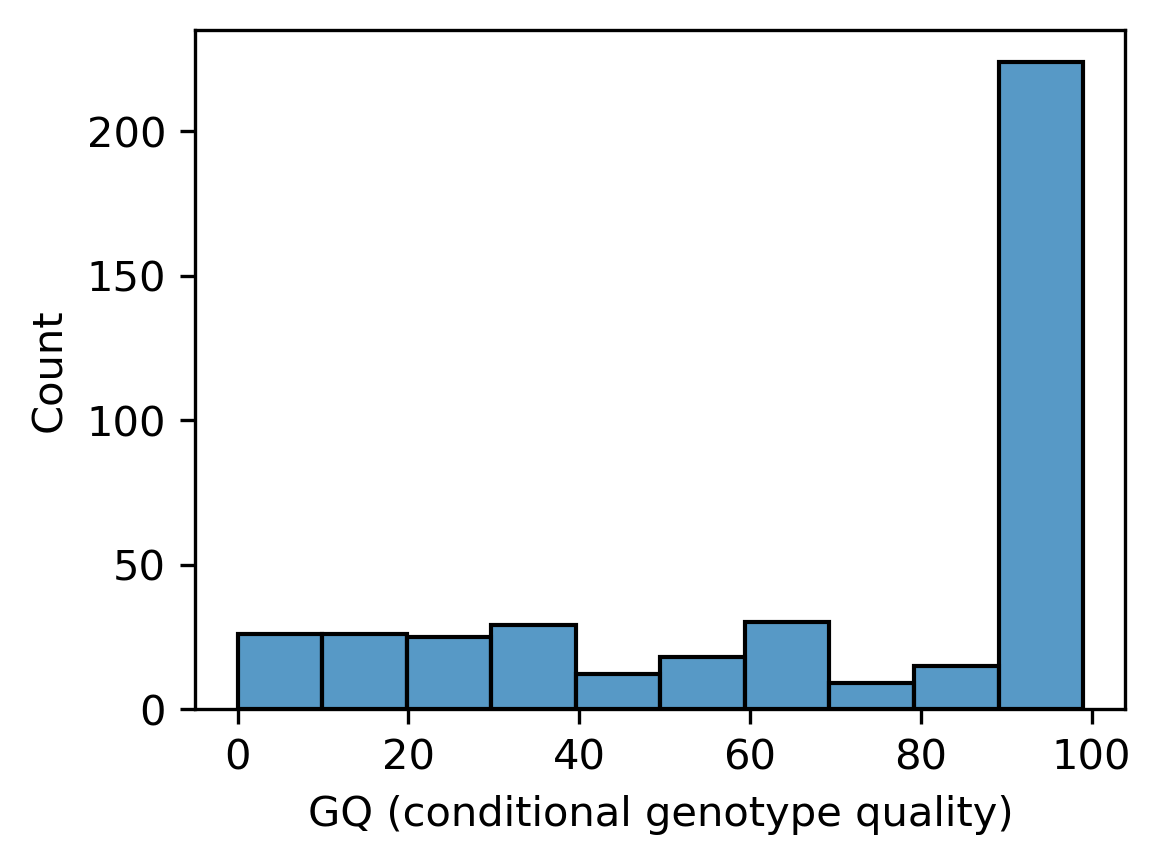

In [49]:
### Check "GQ : conditional genotype quality, encoded as a phred quality"

# Minimum / Maximum GQ
print(max(maf_splited["GQ"].astype(int)))
print(min(maf_splited["GQ"].astype(int)))

# Histogram
g = sns.histplot(maf_splited["GQ"].astype(int))
g.set(xlabel="GQ (conditional genotype quality)")
#plt.show()
#maf_splited["GQ"].astype(int).hist(bins=50, grid=False, xrot=90) # alternative code

In [50]:
### Check "PGT : Physical phasing haplotype information,
# describing how the alternate alleles are phased in relation to one another"

maf_splited["PGT"].value_counts()

0|1    22
1|0     2
Name: PGT, dtype: int64

In [51]:
# Check samples with PGT 0|1
#maf_splited[maf_splited["PGT"] == "0|1"].groupby("PID").count()

maf_splited[maf_splited["PGT"] == "0|1"].head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
40,1,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
42,1,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
1124,2,100106446,rs1866033,A,"G,<NON_REF>",411.77,.,0/1,"26,15,0",41,99,0|1,100106446_A_G,"440,0,883,518,929,1447","9,17,6,9",BaseQRankSum=2.117;DB;DP=42;ExcessHet=3.0103;M...
1960,3,89399736,rs202179455,T,"TA,<NON_REF>",862.73,.,1/1,"0,19,0",19,60,0|1,89399736_T_TA,"900,60,0,900,60,900","0,0,9,10","DB;DP=19;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
1962,3,89399738,rs562459635,T,"TTG,<NON_REF>",862.73,.,1/1,"0,20,0",20,60,0|1,89399736_T_TA,"900,60,0,900,60,900","0,0,10,10","DB;DP=20;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."


In [52]:
# Check samples with PGT 1|0
maf_splited[maf_splited["PGT"] == "1|0"].head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
1126,2,100106464,.,T,"C,<NON_REF>",0,.,0/0,"34,2,0",36,62,1|0,100106446_A_G,"0,62,1357,105,1363,1406","10,24,1,1",BaseQRankSum=-2.244;DP=37;ExcessHet=3.0103;MLE...
9640,17,31336606,rs7406038,T,"A,<NON_REF>",110.77,.,0/1,"13,9,0",22,99,1|0,31336596_GT_G,"139,0,693,179,720,898","8,5,6,3",BaseQRankSum=-2.003;DB;DP=24;ExcessHet=3.0103;...


In [53]:
### Check "PID : "Physical phasing ID information, 
# where each unique ID within a given sample (but not across samples) connects records within a phasing group"

maf_splited["PID"].value_counts()

89472670_TTG_T        5
31336596_GT_G         3
43112308_G_A          2
100106446_A_G         2
152229936_C_A         2
124066457_GT_G        2
189873035_G_C         2
20989703_GGGCGCA_G    2
1806456_G_A           2
89399736_T_TA         2
Name: PID, dtype: int64

In [54]:
# Check samples with PGT 1|0
maf_splited[maf_splited["PID"] == "89472670_TTG_T"]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
2051,3,89472670,rs570994224,TTG,"T,<NON_REF>",115.73,.,0/1,"4,4,0",8,99,0|1,89472670_TTG_T,"153,0,198,168,210,378","0,4,0,4",BaseQRankSum=0.072;DB;DP=9;ExcessHet=3.0103;ML...
2053,3,89472674,rs371736339,CT,"C,<NON_REF>",115.73,.,0/1,"4,4,0",8,99,0|1,89472670_TTG_T,"153,0,198,168,210,378","0,4,0,4",BaseQRankSum=-0.894;DB;DP=8;ExcessHet=3.0103;M...
2055,3,89472678,rs376317195,AC,"A,<NON_REF>",34.73,.,0/1,"4,2,0",6,72,0|1,89472670_TTG_T,"72,0,162,84,168,252","0,4,0,2",BaseQRankSum=1.282;DB;DP=6;ExcessHet=3.0103;ML...
2057,3,89472681,rs369749467,TGAAAG,"T,<NON_REF>",73.73,.,0/1,"5,2,0",7,99,0|1,89472670_TTG_T,"111,0,246,126,255,381","0,5,0,2",BaseQRankSum=-1.309;DB;DP=7;ExcessHet=3.0103;M...
2059,3,89472688,rs200459033,TTTG,"T,<NON_REF>",73.73,.,0/1,"5,3,0",8,99,0|1,89472670_TTG_T,"111,0,246,126,255,381","0,5,0,3",BaseQRankSum=-0.732;DB;DP=8;ExcessHet=3.0103;M...


In [55]:
### Check SB
# Per-sample component statistics which comprise the Fisher's Exact Test to detect strand bias."

print((maf_splited["SB"].str.count(",") + 1).value_counts())

4    414
Name: SB, dtype: int64


In [56]:
maf_splited.head(20)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
40,1,1806456,rs77354509,G,"A,<NON_REF>",514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
42,1,1806461,rs17363334,C,"T,<NON_REF>",546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
88,1,43339569,rs16830693,A,"G,<NON_REF>",881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
121,1,43346404,rs1760670,G,"A,<NON_REF>",232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
131,1,43349193,rs839995,T,"C,<NON_REF>",190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
284,1,179117284,rs779694937,TA,"T,<NON_REF>",0.04,.,0/1,"11,2,0",13,17,None,None,"17,0,267,50,273,323","11,0,2,0",BaseQRankSum=-0.619;DB;DP=14;ExcessHet=3.0103;...
413,1,204525308,rs3789051,C,"T,<NON_REF>",880.77,.,1/1,"0,25,0",25,75,None,None,"909,75,0,909,75,909","0,0,22,3","DB;DP=25;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
445,1,204526467,rs200388119,G,"GTT,<NON_REF>",97.75,.,0/1,"2,5,0",7,23,None,None,"135,0,23,140,38,179","0,2,0,5",BaseQRankSum=-0.876;DB;DP=15;ExcessHet=3.0103;...
465,1,204532210,.,A,"G,<NON_REF>",0,.,0/0,"15,2,0",17,2,None,None,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...
508,1,204542972,rs4252717,T,"C,<NON_REF>",327.78,.,1/1,"0,9,0",9,27,None,None,"356,27,0,356,27,356","0,0,1,8","DB;DP=9;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,..."


# CALCULATE AF

In [57]:
### Calculate AF

maf_splited.iloc[:,8].str.split(",")

40         [13, 14, 0]
42         [15, 15, 0]
88         [14, 27, 0]
121         [11, 8, 0]
131         [11, 6, 0]
             ...      
13049       [8, 10, 0]
13062        [4, 3, 0]
13079    [15, 4, 4, 0]
13292      [28, 15, 0]
13328      [19, 26, 0]
Name: AD, Length: 414, dtype: object

[Text(0.5, 0, 'AF')]

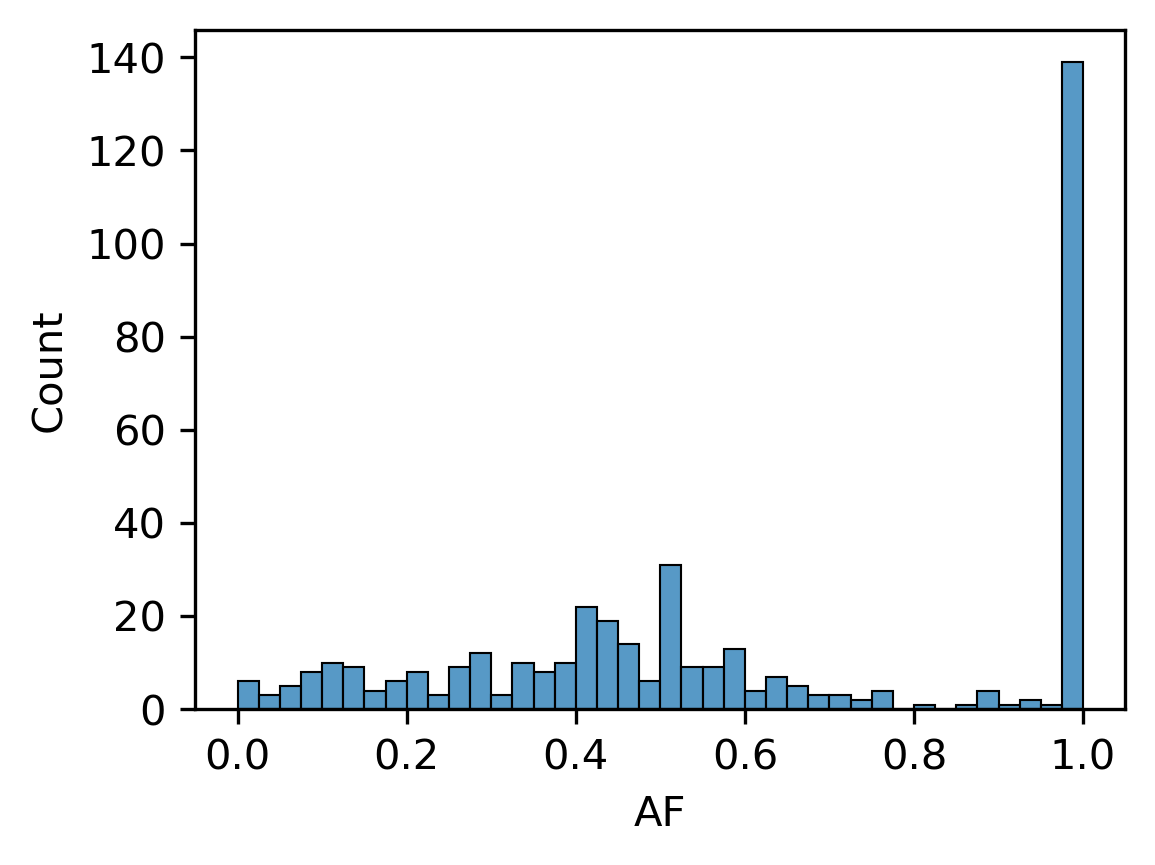

In [97]:
### Calculate AF
# ONLY FIRST ALT CONSIDERED!
# WRONG FOR VARIANTS >ALT!!!

# Loop to calculate AF
AF = []
for i in range(maf_splited.shape[0]):
    depth = maf_splited.iloc[i,8].split(",")
    AF.append(int(depth[1]) / (int(depth[0]) + int(depth[1])))

# Histogram
g = sns.histplot(AF, bins=40)
g.set(xlabel="AF")

---------------------------------
---------------------------------
---------------------------------

# ANALYZE ALT

### REMOVE NON-REF

In [59]:
### 4. Eliminate "<NON_REF>" from ALT column

## PROCESS
# Define functions
def eliminate_nonref(alt):
    """"
    Eliminates "<NON_REF>" from ALT
    Initially checks that "<NON_REF>" is present
    """
    if alt.split(",")[-1] == "<NON_REF>":
        wo_nonref = ",".join(alt.split(",")[:-1])
        return wo_nonref
    else:
        return alt
# Eliminate "<NON_REF>"
maf_splited["ALT"] = maf_splited["ALT"].apply(lambda x: eliminate_nonref(x))
maf_splited2["ALT"] = maf_splited2["ALT"].apply(lambda x: eliminate_nonref(x))


## CHECK
maf_splited

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
40,1,1806456,rs77354509,G,A,514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
42,1,1806461,rs17363334,C,T,546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
88,1,43339569,rs16830693,A,G,881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
121,1,43346404,rs1760670,G,A,232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
131,1,43349193,rs839995,T,C,190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,X,124066463,rs34397445,AT,A,358.73,.,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...
13062,X,124068468,rs113697794,C,CTATA,76.73,.,0/1,"4,3,0",7,99,None,None,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...
13079,X,124071128,rs759815507,CT,"C,CTT",3.39,.,0/1,"15,4,4,0",23,20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...
13292,X,124392181,rs2076165,T,C,426.77,.,0/1,"28,15,0",43,99,None,None,"455,0,826,539,871,1410","13,15,7,8",BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...


In [60]:
### Save dataframes
# maf_splited.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/analysis_ch_genes_vep_202104/results/ch_variants_maf1.txt',
#                  sep="\t", index = False)
# maf_splited2.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/analysis_ch_genes_vep_202104/results/ch_variants_maf2.txt',
#                  sep="\t", index = False)

### VARIANTS WITH >1 ALT


In [61]:
### Check variants with >1 ALT

# Number of variants
print("Number of variants with >1 ALT (MAF1 & MAF2):")
print(maf_splited[maf_splited["ALT"].str.count(",") > 0].shape[0])
print(maf_splited2[maf_splited2["ALT"].str.count(",") > 0].shape[0])
print("Number of variants with 2 ALT (MAF1 & MAF2):")
print(maf_splited[maf_splited["ALT"].str.count(",") == 1].shape[0])
print(maf_splited2[maf_splited2["ALT"].str.count(",") == 1].shape[0])
print("Number of variants with 3 ALT (MAF1 & MAF2):")
print(maf_splited[maf_splited["ALT"].str.count(",") == 2].shape[0])
print(maf_splited2[maf_splited2["ALT"].str.count(",") == 2].shape[0])
print("Number of variants with 4 ALT (MAF1 & MAF2):")
print(maf_splited[maf_splited["ALT"].str.count(",") == 3].shape[0])
print(maf_splited2[maf_splited2["ALT"].str.count(",") == 3].shape[0])
print("Number of variants with 5 ALT (MAF1 & MAF2):")
print(maf_splited[maf_splited["ALT"].str.count(",") > 3].shape[0])
print(maf_splited2[maf_splited2["ALT"].str.count(",") > 3].shape[0])


Number of variants with >1 ALT (MAF1 & MAF2):
39
57
Number of variants with 2 ALT (MAF1 & MAF2):
32
39
Number of variants with 3 ALT (MAF1 & MAF2):
4
11
Number of variants with 4 ALT (MAF1 & MAF2):
3
5
Number of variants with 5 ALT (MAF1 & MAF2):
0
2


In [62]:
# Show variants 2 ALT
maf_splited[maf_splited["ALT"].str.count(",") == 1]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
965,2,99707699,.,CT,"C,CTT",0.01,.,0/2,"9,2,2,0",13,12,None,None,"12,13,230,0,171,213,46,229,214,265","0,9,0,4",BaseQRankSum=0.306;DP=17;ExcessHet=3.0103;MLEA...
1232,2,197400449,rs770725816,T,"A,TA",308.73,.,0/1,"15,16,0,0",31,99,None,None,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...
1646,3,70959190,rs112773801,G,"GT,GTT",3.96,.,0/2,"9,2,2,0",13,3,None,None,"37,3,199,0,185,292,57,226,269,307","9,0,4,0",BaseQRankSum=0.068;DB;DP=16;ExcessHet=3.0103;M...
1676,3,70971977,rs753205403,GA,"G,GAA",0,.,0/0,"27,3,5,0",35,1,None,None,"0,24,793,1,606,682,101,759,697,831","23,4,6,2",BaseQRankSum=-0.886;DB;DP=38;ExcessHet=3.0103;...
2252,4,105241952,rs201078423,TTC,"*,T",154.73,.,0/2,"7,5,8,0",20,99,None,None,"192,111,330,0,106,127,201,321,171,390","1,6,6,7",BaseQRankSum=0.960;DB;DP=24;ExcessHet=3.0103;M...
2253,4,105241953,rs368755200,TC,"*,T",443.73,.,1/2,"1,13,5,0",19,85,None,None,"481,85,100,290,0,265,450,125,306,464","0,1,7,11",BaseQRankSum=1.288;DB;DP=24;ExcessHet=3.0103;M...
2254,4,105241954,rs2866777,C,"*,T",876.77,.,1/1,"0,18,1,0",19,31,None,None,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...."
3050,7,102255385,rs111309124,C,"CA,CAA",933.73,.,0/1,"19,45,4,0",68,99,None,None,"971,0,242,886,333,1484,1014,421,1423,1504","9,10,28,21",BaseQRankSum=-0.208;DB;DP=79;ExcessHet=3.0103;...
3069,7,102257306,rs35391223,C,"CT,CTT",213.73,.,0/1,"19,12,3,0",34,99,None,None,"251,0,405,192,417,804,292,479,760,820","12,7,8,7",BaseQRankSum=1.399;DB;DP=35;ExcessHet=3.0103;M...
3078,7,102257898,.,CT,"C,CTT",21.76,.,0/2,"31,8,10,0",49,21,None,None,"59,21,808,0,527,716,185,784,728,953","20,11,15,3",BaseQRankSum=0.533;DP=58;ExcessHet=3.0103;MLEA...


In [63]:
# Show variants 3 ALT
maf_splited[maf_splited["ALT"].str.count(",") == 2]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
5853,10,121743916,rs770801152,C,"CT,CTT,CTTT",116.74,.,1/2,"4,6,3,2,0",15,14,None,None,"154,28,36,53,0,115,88,14,117,229,130,64,129,16...","0,4,0,11",BaseQRankSum=-1.937;DB;DP=23;ExcessHet=3.0103;...
9564,17,31320343,rs752121503,TA,"T,TAA,TAAA",161.73,.,0/2,"7,4,11,2,0",24,83,None,None,"199,193,421,0,83,143,206,393,168,1107,251,404,...","7,0,12,5",BaseQRankSum=-0.229;DB;DP=31;ExcessHet=3.0103;...
12875,X,124051099,rs747648873,CTT,"C,CT,CTTT",65.73,.,2/3,"1,1,3,4,0",9,52,None,None,"103,87,283,52,81,87,54,65,0,84,124,176,99,95,193","1,0,8,0",BaseQRankSum=0.282;DB;DP=13;ExcessHet=3.0103;M...
12938,X,124061743,rs755358841,C,"CT,CTT,CTTT",0.02,.,0/1,"5,2,1,1,0",9,5,None,None,"13,0,98,5,91,156,11,88,156,208,24,107,159,172,175","5,0,4,0",BaseQRankSum=1.264;DB;DP=16;ExcessHet=3.0103;M...


In [64]:
# Show variants 4 ALT
maf_splited[maf_splited["ALT"].str.count(",") == 3]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
6332,11,108271228,rs745427727,CTTT,"C,CT,CTT,CTTTT",243.73,.,0/3,"21,2,4,15,6,0",48,99,None,None,"281,300,1494,213,1086,1018,0,509,457,443,258,7...","19,2,18,9",BaseQRankSum=-0.621;DB;DP=54;ExcessHet=3.0103;...
9077,17,7675393,.,CTTTTTT,"C,CTT,CTTT,CTTTT",1650.73,.,3/4,"1,3,7,32,11,0",54,49,None,None,"1688,1517,1789,843,879,826,211,125,49,115,835,...","0,1,10,43",BaseQRankSum=1.478;DP=74;ExcessHet=3.0103;MLEA...
12946,X,124061774,.,T,"A,TAAAAAA,TTAAAAAA,TTTAAAAAA",0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...


In [65]:
# Show variants >4 ALT
maf_splited2[maf_splited2["ALT"].str.count(",") > 3]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
3563,8,116856292,rs777741286,TAAA,"T,TA,TAA,TAAAA,TAAAAA",121.73,.,0/3,"17,6,3,11,4,1,0",42,56,"159,56,948,80,653,655,0,257,305,296,190,393,35...","5,12,8,17",None,None,BaseQRankSum=-0.198;DB;DP=66;ExcessHet=3.0103;...
4782,10,121927341,.,CTT,"CT,*,C,CTTT,ATT,TTT",235.73,.,0/1,"88,24,0,4,3,2,1,0",122,99,"273,0,2132,623,2488,5450,449,2368,3877,3743,51...","54,34,19,15",None,None,BaseQRankSum=-0.187;DP=136;ExcessHet=3.0103;ML...


---------------------------------
---------------------------------
---------------------------------

# DIVIDE ALT IN DIFFERENT LINES AND CALCULATE VAF


In [66]:
maf_splited

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
40,1,1806456,rs77354509,G,A,514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
42,1,1806461,rs17363334,C,T,546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
88,1,43339569,rs16830693,A,G,881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
121,1,43346404,rs1760670,G,A,232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
131,1,43349193,rs839995,T,C,190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,X,124066463,rs34397445,AT,A,358.73,.,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...
13062,X,124068468,rs113697794,C,CTATA,76.73,.,0/1,"4,3,0",7,99,None,None,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...
13079,X,124071128,rs759815507,CT,"C,CTT",3.39,.,0/1,"15,4,4,0",23,20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...
13292,X,124392181,rs2076165,T,C,426.77,.,0/1,"28,15,0",43,99,None,None,"455,0,826,539,871,1410","13,15,7,8",BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...


In [67]:
### 1 ALT

df1 = maf_splited[~maf_splited['ALT'].str.contains(',')]
#df1 = maf_splited2[~maf_splited2['ALT'].str.contains(',')]

# Calculate VAF (& add number of ALT=1)
df1['AD_alt'] = df1['AD'].str.split(',', expand=True)[1].astype(int)
df1['VAF_alt'] = df1['AD'].str.split(',', expand=True)[1].astype(int) / df1['DP'].astype(int)
df1['VAF_ref'] = df1['AD'].str.split(',', expand=True)[0].astype(int) / df1['DP'].astype(int)
df1['ALT_num'] = 1

df1.head(50)
df1

<ipython-input-67-156752bd1534>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AD_alt'] = df1['AD'].str.split(',', expand=True)[1].astype(int)
<ipython-input-67-156752bd1534>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['VAF_alt'] = df1['AD'].str.split(',', expand=True)[1].astype(int) / df1['DP'].astype(int)
<ipython-input-67-156752bd1534>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO,AD_alt,VAF_alt,VAF_ref,ALT_num
40,1,1806456,rs77354509,G,A,514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,14,0.518519,0.481481,1
42,1,1806461,rs17363334,C,T,546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,15,0.500000,0.500000,1
88,1,43339569,rs16830693,A,G,881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,27,0.658537,0.341463,1
121,1,43346404,rs1760670,G,A,232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,8,0.421053,0.578947,1
131,1,43349193,rs839995,T,C,190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,6,0.352941,0.647059,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13047,X,124066457,rs760494042,GT,G,358.73,.,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=-0.324;DB;DP=20;ExcessHet=3.0103;...,10,0.555556,0.444444,1
13049,X,124066463,rs34397445,AT,A,358.73,.,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,10,0.555556,0.444444,1
13062,X,124068468,rs113697794,C,CTATA,76.73,.,0/1,"4,3,0",7,99,None,None,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,3,0.428571,0.571429,1
13292,X,124392181,rs2076165,T,C,426.77,.,0/1,"28,15,0",43,99,None,None,"455,0,826,539,871,1410","13,15,7,8",BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...,15,0.348837,0.651163,1


In [68]:
# 1 ALT
# CON FUNCIÓN

# def calculate_VAF(var):
#     #print(var)
#     VAF = int(var['AD'].split(',')[1]) / int(var['DP'])
#     return VAF

# df1 = maf_splited[~maf_splited['ALT'].str.contains(',')]
# df1['VAF'] = df1.apply(lambda x: calculate_VAF(x), axis=1)
# df1['VAFref'] = df1['VAF']

#df1['AF'] = maf_splited['ALT'].apply(lambda x: x.str.split(',', expand=True)[1].astype(int) / df0['DP'].astype(int))

# df1


#maf_splited["ALT"] = maf_splited["ALT"].apply(lambda x: eliminate_nonref(x))

In [69]:
### 2 ALT OR MORE

df2 = maf_splited[maf_splited['ALT'].str.contains(',')]
#df2 = maf_splited2[maf_splited2['ALT'].str.contains(',')]


print(df2.shape)

df2



(39, 16)


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO
965,2,99707699,.,CT,"C,CTT",0.01,.,0/2,"9,2,2,0",13,12,None,None,"12,13,230,0,171,213,46,229,214,265","0,9,0,4",BaseQRankSum=0.306;DP=17;ExcessHet=3.0103;MLEA...
1232,2,197400449,rs770725816,T,"A,TA",308.73,.,0/1,"15,16,0,0",31,99,None,None,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...
1646,3,70959190,rs112773801,G,"GT,GTT",3.96,.,0/2,"9,2,2,0",13,3,None,None,"37,3,199,0,185,292,57,226,269,307","9,0,4,0",BaseQRankSum=0.068;DB;DP=16;ExcessHet=3.0103;M...
1676,3,70971977,rs753205403,GA,"G,GAA",0,.,0/0,"27,3,5,0",35,1,None,None,"0,24,793,1,606,682,101,759,697,831","23,4,6,2",BaseQRankSum=-0.886;DB;DP=38;ExcessHet=3.0103;...
2252,4,105241952,rs201078423,TTC,"*,T",154.73,.,0/2,"7,5,8,0",20,99,None,None,"192,111,330,0,106,127,201,321,171,390","1,6,6,7",BaseQRankSum=0.960;DB;DP=24;ExcessHet=3.0103;M...
2253,4,105241953,rs368755200,TC,"*,T",443.73,.,1/2,"1,13,5,0",19,85,None,None,"481,85,100,290,0,265,450,125,306,464","0,1,7,11",BaseQRankSum=1.288;DB;DP=24;ExcessHet=3.0103;M...
2254,4,105241954,rs2866777,C,"*,T",876.77,.,1/1,"0,18,1,0",19,31,None,None,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...."
3050,7,102255385,rs111309124,C,"CA,CAA",933.73,.,0/1,"19,45,4,0",68,99,None,None,"971,0,242,886,333,1484,1014,421,1423,1504","9,10,28,21",BaseQRankSum=-0.208;DB;DP=79;ExcessHet=3.0103;...
3069,7,102257306,rs35391223,C,"CT,CTT",213.73,.,0/1,"19,12,3,0",34,99,None,None,"251,0,405,192,417,804,292,479,760,820","12,7,8,7",BaseQRankSum=1.399;DB;DP=35;ExcessHet=3.0103;M...
3078,7,102257898,.,CT,"C,CTT",21.76,.,0/2,"31,8,10,0",49,21,None,None,"59,21,808,0,527,716,185,784,728,953","20,11,15,3",BaseQRankSum=0.533;DP=58;ExcessHet=3.0103;MLEA...


In [70]:
### 2 ALT OR MORE
### GOOD!!
### con deepcopy

# Select variants with 2+ ALT
df2 = maf_splited[maf_splited['ALT'].str.contains(',')]
#df2 = maf_splited2[maf_splited2['ALT'].str.contains(',')]

import copy
#split_ukbcol_cp = copy.deepcopy(split_ukbcol)

df2_list = df2.values.tolist()
df2_newlist = []

for row in df2_list:
    alts = row[4].split(',')
    ADs = row[8].split(',')
    DP = row[9]
    for i in range(0,len(alts)):
        #print(ADs[i+1])
        #print(DP)
        newrow = copy.deepcopy(row)
                
        newrow[4] = alts[i]

        newrow.append([])
        newrow[16] = int(ADs[i+1])

        newrow.append([])
        newrow[17] = int(ADs[i+1]) / int(DP)
        
        newrow.append([])
        newrow[18] = int(ADs[0]) / int(DP)

        newrow.append([])
        newrow[19] = len(alts)
        #newrow = [row[0],row[1],row[2], row[3], alts[i]] (monica)
        df2_newlist.append(newrow)
        
        

newdf2 = pd.DataFrame(df2_newlist)
newdf2.columns = df1.columns
newdf2.head(20)
newdf2

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO,AD_alt,VAF_alt,VAF_ref,ALT_num
0,2,99707699,.,CT,C,0.01,.,0/2,"9,2,2,0",13,12,None,None,"12,13,230,0,171,213,46,229,214,265","0,9,0,4",BaseQRankSum=0.306;DP=17;ExcessHet=3.0103;MLEA...,2,0.153846,0.692308,2
1,2,99707699,.,CT,CTT,0.01,.,0/2,"9,2,2,0",13,12,None,None,"12,13,230,0,171,213,46,229,214,265","0,9,0,4",BaseQRankSum=0.306;DP=17;ExcessHet=3.0103;MLEA...,2,0.153846,0.692308,2
2,2,197400449,rs770725816,T,A,308.73,.,0/1,"15,16,0,0",31,99,None,None,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,16,0.516129,0.483871,2
3,2,197400449,rs770725816,T,TA,308.73,.,0/1,"15,16,0,0",31,99,None,None,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,0,0.000000,0.483871,2
4,3,70959190,rs112773801,G,GT,3.96,.,0/2,"9,2,2,0",13,3,None,None,"37,3,199,0,185,292,57,226,269,307","9,0,4,0",BaseQRankSum=0.068;DB;DP=16;ExcessHet=3.0103;M...,2,0.153846,0.692308,2
5,3,70959190,rs112773801,G,GTT,3.96,.,0/2,"9,2,2,0",13,3,None,None,"37,3,199,0,185,292,57,226,269,307","9,0,4,0",BaseQRankSum=0.068;DB;DP=16;ExcessHet=3.0103;M...,2,0.153846,0.692308,2
6,3,70971977,rs753205403,GA,G,0,.,0/0,"27,3,5,0",35,1,None,None,"0,24,793,1,606,682,101,759,697,831","23,4,6,2",BaseQRankSum=-0.886;DB;DP=38;ExcessHet=3.0103;...,3,0.085714,0.771429,2
7,3,70971977,rs753205403,GA,GAA,0,.,0/0,"27,3,5,0",35,1,None,None,"0,24,793,1,606,682,101,759,697,831","23,4,6,2",BaseQRankSum=-0.886;DB;DP=38;ExcessHet=3.0103;...,5,0.142857,0.771429,2
8,4,105241952,rs201078423,TTC,*,154.73,.,0/2,"7,5,8,0",20,99,None,None,"192,111,330,0,106,127,201,321,171,390","1,6,6,7",BaseQRankSum=0.960;DB;DP=24;ExcessHet=3.0103;M...,5,0.250000,0.350000,2
9,4,105241952,rs201078423,TTC,T,154.73,.,0/2,"7,5,8,0",20,99,None,None,"192,111,330,0,106,127,201,321,171,390","1,6,6,7",BaseQRankSum=0.960;DB;DP=24;ExcessHet=3.0103;M...,8,0.400000,0.350000,2


In [71]:
## Concatenate

fulldf = pd.concat([df1, newdf2], ignore_index=True)

fulldf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO,AD_alt,VAF_alt,VAF_ref,ALT_num
0,1,1806456,rs77354509,G,A,514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,14,0.518519,0.481481,1
1,1,1806461,rs17363334,C,T,546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,15,0.500000,0.500000,1
2,1,43339569,rs16830693,A,G,881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,27,0.658537,0.341463,1
3,1,43346404,rs1760670,G,A,232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,8,0.421053,0.578947,1
4,1,43349193,rs839995,T,C,190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,6,0.352941,0.647059,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,X,124061774,.,T,TAAAAAA,0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...,1,0.037037,0.925926,4
459,X,124061774,.,T,TTAAAAAA,0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...,0,0.000000,0.925926,4
460,X,124061774,.,T,TTTAAAAAA,0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...,1,0.037037,0.925926,4
461,X,124071128,rs759815507,CT,C,3.39,.,0/1,"15,4,4,0",23,20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...,4,0.173913,0.652174,2


In [72]:
### Check AD

fulldf["AD_alt"].astype(str).value_counts().head(50)

2     47
3     34
4     31
5     25
6     23
7     19
8     16
9     15
12    14
11    14
15    13
21    11
1     11
17    10
22     9
10     9
13     9
19     9
23     8
0      8
30     8
25     8
27     8
18     7
16     7
14     6
24     6
29     5
31     5
49     5
20     5
34     4
35     4
39     3
28     3
61     3
37     3
33     2
56     2
32     2
36     2
45     2
59     2
40     2
26     2
73     2
51     2
53     2
46     2
87     1
Name: AD_alt, dtype: int64

In [73]:
### Type of mutation

def variant_type(var):
    if (len(var[3]) == len(var[4])) & (len(var[3]) == 1):
        return 'SNV'
    elif len(var[3]) != len(var[4]):
        return 'Indel'
    elif (len(var[3]) == len(var[4])) & (len(var[3]) > 1):
        return 'MNV'
    else:
        return 'Unknown'
        
#maf_splited["ALT"] = maf_splited["ALT"].apply(lambda x: eliminate_nonref(x))

fulldf['var_type'] = fulldf.apply(lambda x: variant_type(x), axis=1)

fulldf


# alternative function
# def variant_type(var):
#     "Check if the variant is SNV, MNV, or Indel"
#     if len(var[3]) != len(var[4]):
#         return 'Indel'
#     elif (len(row[3]) == len(var[4])) & (len(var[3]) > 1):
#         return 'MNV'
#     else:
#         return 'SNV'

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,GT,AD,DP,GQ,PGT,PID,PL,SB,INFO,AD_alt,VAF_alt,VAF_ref,ALT_num,var_type
0,1,1806456,rs77354509,G,A,514.77,.,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,14,0.518519,0.481481,1,SNV
1,1,1806461,rs17363334,C,T,546.77,.,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,15,0.500000,0.500000,1,SNV
2,1,43339569,rs16830693,A,G,881.77,.,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,27,0.658537,0.341463,1,SNV
3,1,43346404,rs1760670,G,A,232.77,.,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,8,0.421053,0.578947,1,SNV
4,1,43349193,rs839995,T,C,190.77,.,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,6,0.352941,0.647059,1,SNV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,X,124061774,.,T,TAAAAAA,0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...,1,0.037037,0.925926,4,Indel
459,X,124061774,.,T,TTAAAAAA,0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...,0,0.000000,0.925926,4,Indel
460,X,124061774,.,T,TTTAAAAAA,0,.,0/0,"25,0,1,0,1,0",27,42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...,1,0.037037,0.925926,4,Indel
461,X,124071128,rs759815507,CT,C,3.39,.,0/1,"15,4,4,0",23,20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...,4,0.173913,0.652174,2,Indel


In [74]:
print('Type of variants (all):')
print(fulldf['var_type'].value_counts())
print()

print('Type of variants (1 ALT):')
print(fulldf.loc[fulldf['ALT_num'] == 1, 'var_type'].value_counts())
print()

print('Type of variants (2 ALT):')
print(fulldf.loc[fulldf['ALT_num'] == 2, 'var_type'].value_counts())
print()

print('Type of variants (>2 ALT):')
print(fulldf.loc[fulldf['ALT_num'] > 2, 'var_type'].value_counts())
print()

Type of variants (all):
SNV      311
Indel    152
Name: var_type, dtype: int64

Type of variants (1 ALT):
SNV      301
Indel     74
Name: var_type, dtype: int64

Type of variants (2 ALT):
Indel    55
SNV       9
Name: var_type, dtype: int64

Type of variants (>2 ALT):
Indel    23
SNV       1
Name: var_type, dtype: int64



In [75]:
### 7. Reorder columns and create new column for VEP output

## PROCESS
fulldf["VEP"] = ""
fulldf = fulldf[['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'VEP',
                                     'AD_alt', 'DP', 'VAF_alt', 'VAF_ref', 'ALT_num', 'var_type',
                                     'GT', 'AD', 'GQ', 'PGT', 'PID', 'PL', 'SB', 'INFO']]
## CHECK
fulldf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
0,1,1806456,rs77354509,G,A,514.77,.,,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
1,1,1806461,rs17363334,C,T,546.77,.,,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
2,1,43339569,rs16830693,A,G,881.77,.,,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,None,None,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
3,1,43346404,rs1760670,G,A,232.77,.,,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,None,None,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
4,1,43349193,rs839995,T,C,190.77,.,,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,None,None,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,X,124061774,.,T,TAAAAAA,0,.,,1,27,0.037037,0.925926,4,Indel,0/0,"25,0,1,0,1,0",42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...
459,X,124061774,.,T,TTAAAAAA,0,.,,0,27,0.000000,0.925926,4,Indel,0/0,"25,0,1,0,1,0",42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...
460,X,124061774,.,T,TTTAAAAAA,0,.,,1,27,0.037037,0.925926,4,Indel,0/0,"25,0,1,0,1,0",42,None,None,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...
461,X,124071128,rs759815507,CT,C,3.39,.,,4,23,0.173913,0.652174,2,Indel,0/1,"15,4,4,0",20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...


In [76]:
# Save

fulldf.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/analysis_ch_genes_vep_202104/results/ch_variants_1allel_maf1.txt',
               sep="\t", index = False)

# fulldf.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/analysis_ch_genes_vep_202104/results/ch_variants_1allel_maf2.txt',
#               sep="\t", index = False)


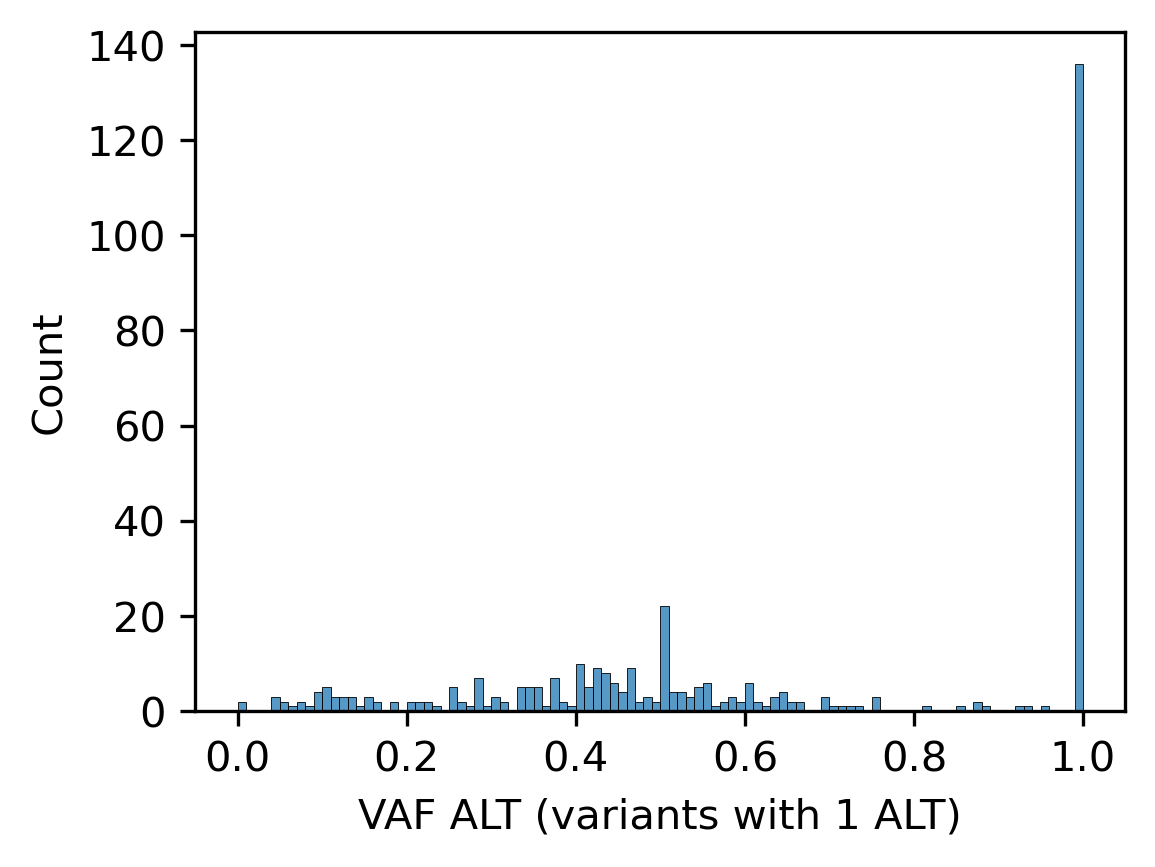

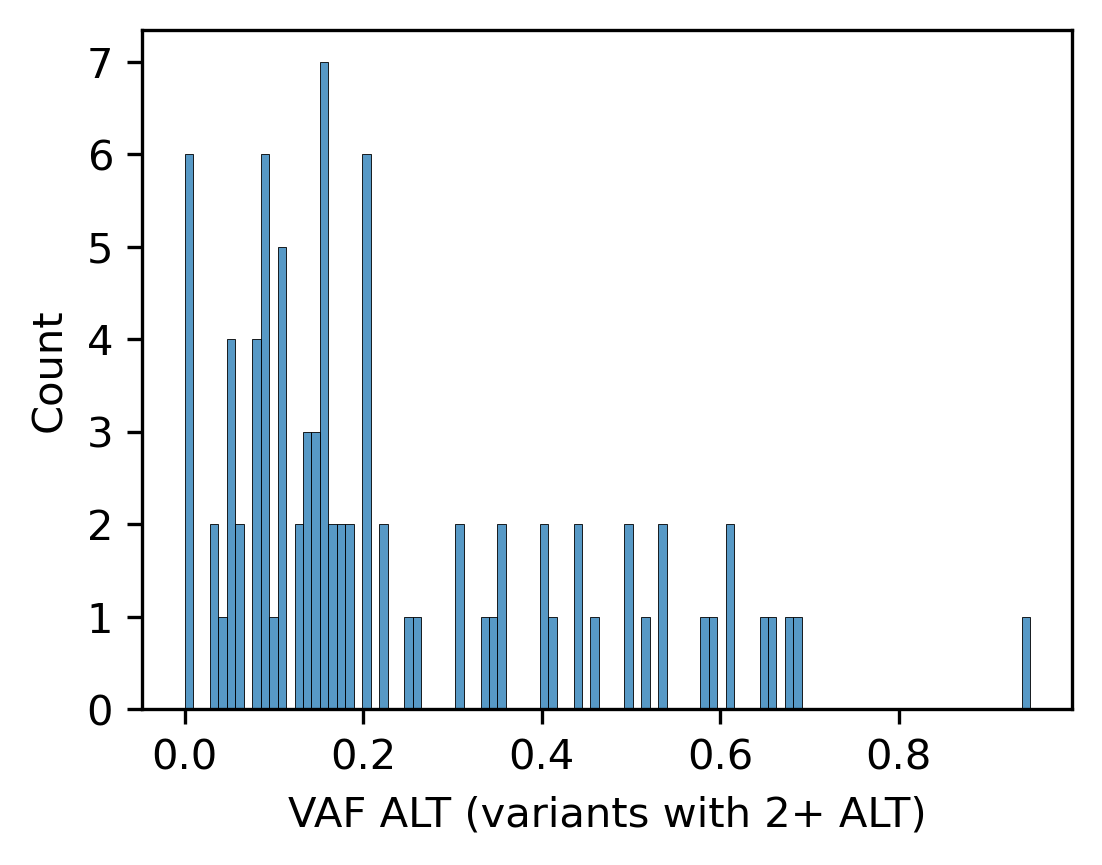

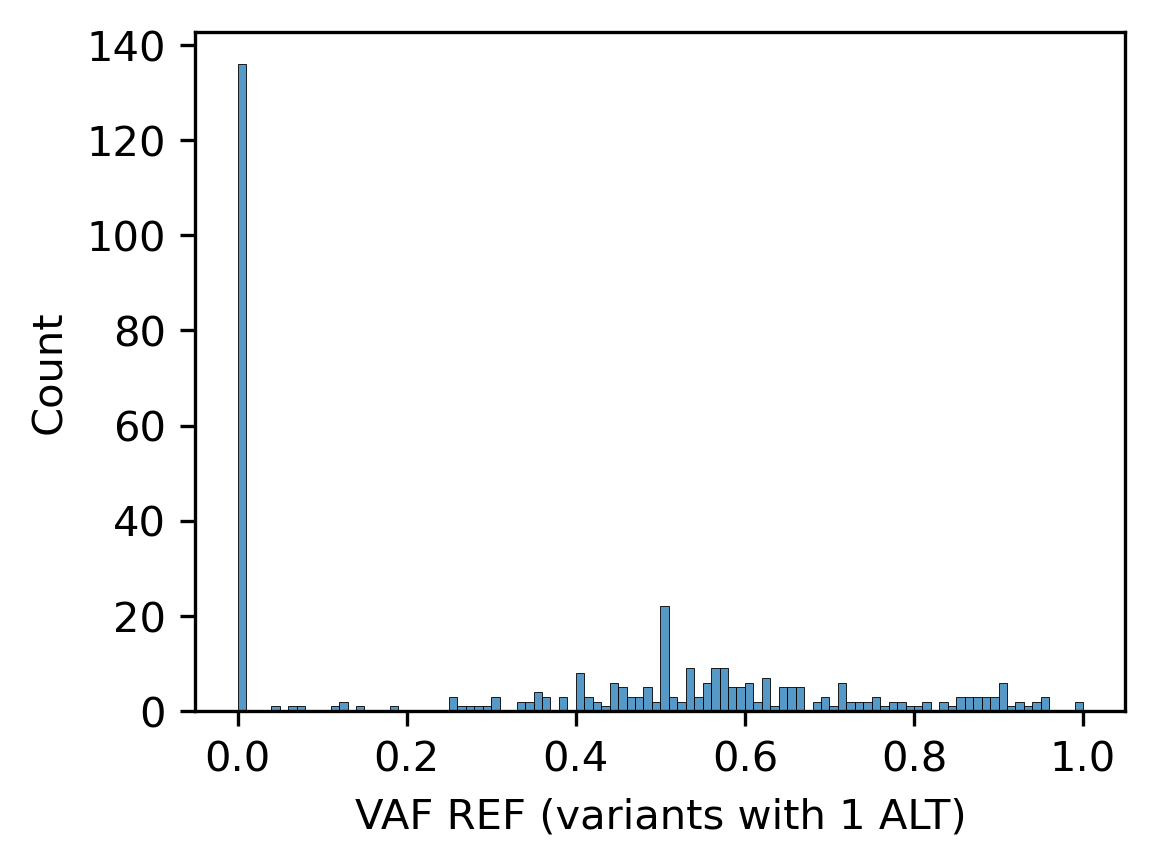

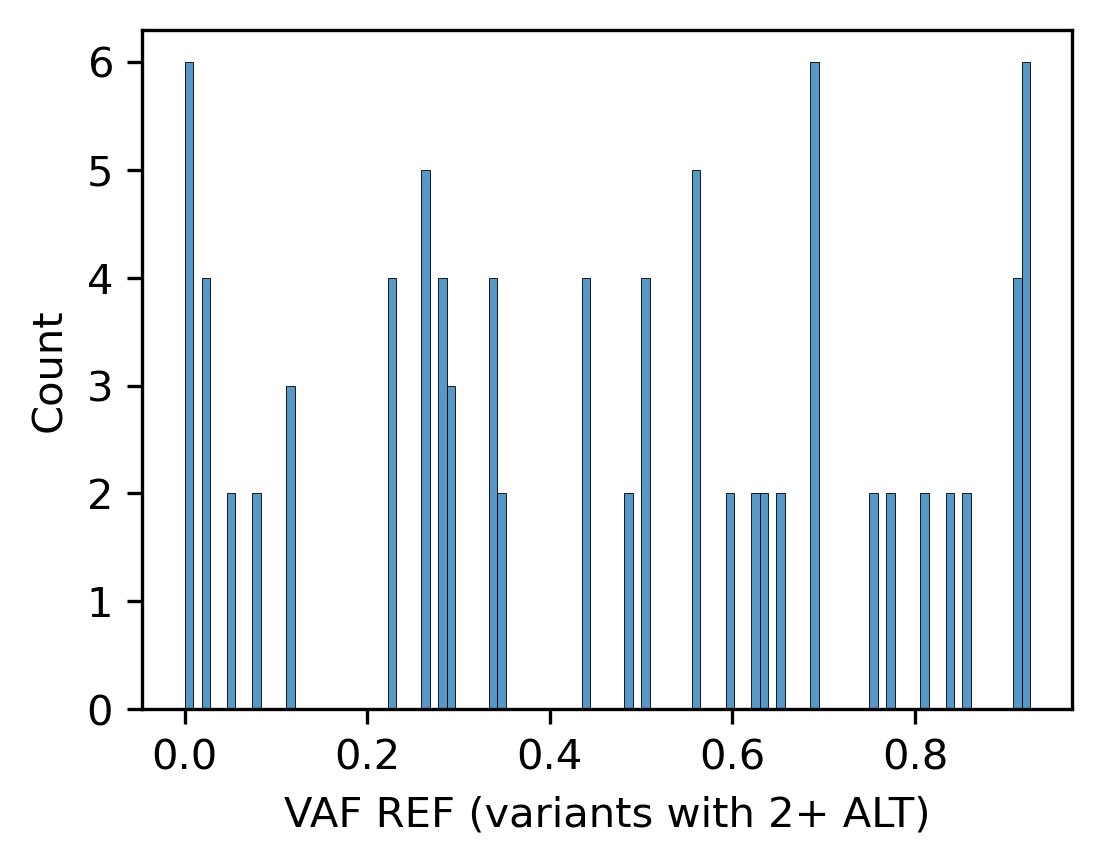

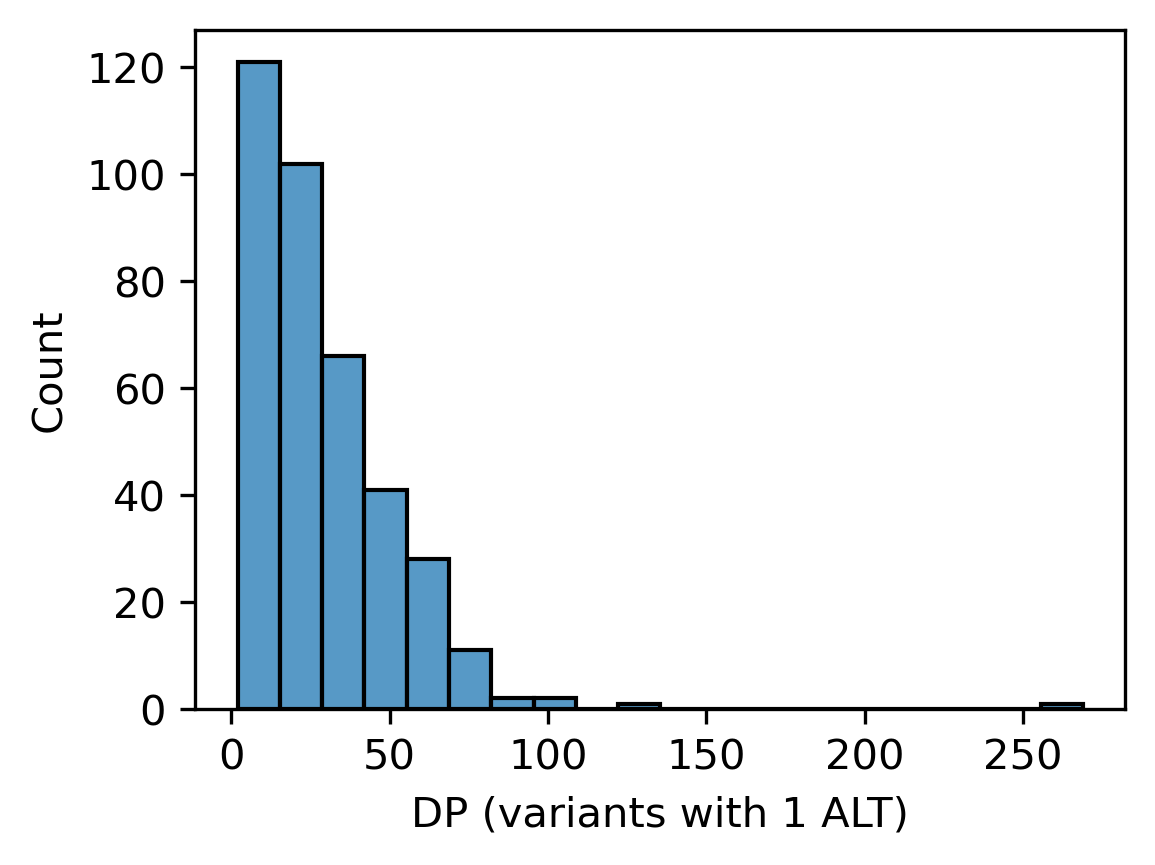

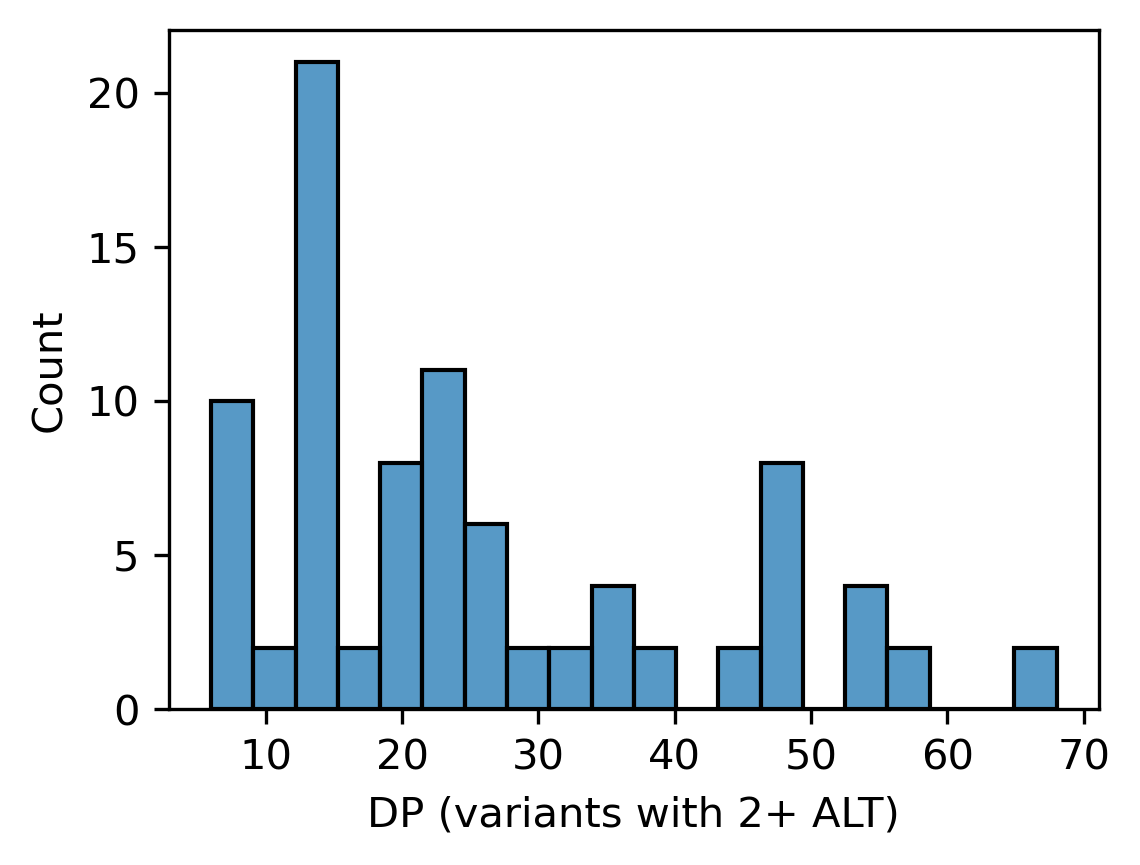

In [77]:
### Histograms

## VAF ALT
g = sns.histplot(df1["VAF_alt"], bins=100)
g.set(xlabel="VAF ALT (variants with 1 ALT)")
plt.show()

g = sns.histplot(newdf2["VAF_alt"], bins=100)
g.set(xlabel="VAF ALT (variants with 2+ ALT)")
plt.show()

## VAF REF
g = sns.histplot(df1["VAF_ref"], bins=100)
g.set(xlabel="VAF REF (variants with 1 ALT)")
plt.show()

g = sns.histplot(newdf2["VAF_ref"], bins=100)
g.set(xlabel="VAF REF (variants with 2+ ALT)")
plt.show()


## DP
g = sns.histplot(df1["DP"].astype(int), bins=20)
g.set(xlabel="DP (variants with 1 ALT)")
plt.show()

g = sns.histplot(newdf2["DP"].astype(int), bins=20)
g.set(xlabel="DP (variants with 2+ ALT)")
plt.show()


In [78]:
###
fulldf[fulldf['VAF_ref'] == 0]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
6,1,204525308,rs3789051,C,T,880.77,.,,25,25,1.000000,0.0,1,SNV,1/1,"0,25,0",75,None,None,"909,75,0,909,75,909","0,0,22,3","DB;DP=25;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
9,1,204542972,rs4252717,T,C,327.78,.,,9,9,1.000000,0.0,1,SNV,1/1,"0,9,0",27,None,None,"356,27,0,356,27,356","0,0,1,8","DB;DP=9;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,..."
10,1,204546735,rs2290855,C,T,445.77,.,,12,12,1.000000,0.0,1,SNV,1/1,"0,12,0",36,None,None,"474,36,0,474,36,474","0,0,12,0","DB;DP=12;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
11,1,204546897,rs2290854,A,G,501.77,.,,12,12,1.000000,0.0,1,SNV,1/1,"0,12,0",36,None,None,"530,36,0,530,36,530","0,0,0,12","DB;DP=12;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
12,1,204549714,rs4245739,C,A,421.77,.,,11,11,1.000000,0.0,1,SNV,1/1,"0,11,0",33,None,None,"450,33,0,450,33,450","0,0,0,11","DB;DP=11;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,4,105241954,rs2866777,C,T,876.77,.,,1,19,0.052632,0.0,2,SNV,1/1,"0,18,1,0",31,None,None,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...."
431,17,42207487,rs377476267,GCACA,G,158.73,.,,3,6,0.500000,0.0,2,Indel,1/2,"0,3,3,0",71,None,None,"196,80,71,91,0,74,185,80,88,180","0,0,6,0","DB;DP=9;ExcessHet=3.0103;MLEAC=1,1,0;MLEAF=0.5..."
432,17,42207487,rs377476267,GCACA,GCA,158.73,.,,3,6,0.500000,0.0,2,Indel,1/2,"0,3,3,0",71,None,None,"196,80,71,91,0,74,185,80,88,180","0,0,6,0","DB;DP=9;ExcessHet=3.0103;MLEAC=1,1,0;MLEAF=0.5..."
441,X,67546514,rs760580125,T,TGGC,582.73,.,,7,12,0.583333,0.0,2,Indel,1/2,"0,7,5,0",99,None,None,"620,342,310,236,0,220,604,341,246,603","0,0,8,4","DB;DP=33;ExcessHet=3.0103;MLEAC=1,1,0;MLEAF=0...."


-----------------------
# INFO COLUMN


In [88]:
### Get splitted INFO column

split_infocol = maf_real["INFO"].str.split(";", expand=True)
split_infocol.head(10)

,0,1,2,3,4,5,6,7,8
40,BaseQRankSum=-3.829,DB,DP=28,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=100800,28",ReadPosRankSum=1.106
42,BaseQRankSum=-4.741,DB,DP=31,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=111600,31",ReadPosRankSum=1.022
88,BaseQRankSum=1.575,DB,DP=41,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=147600,41",ReadPosRankSum=-0.468
121,BaseQRankSum=-3.638,DB,DP=19,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=68400,19",ReadPosRankSum=1.117
131,BaseQRankSum=3.403,DB,DP=17,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=61200,17",ReadPosRankSum=-0.908
284,BaseQRankSum=-0.619,DB,DP=14,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=50400,14",ReadPosRankSum=-1.382
413,DB,DP=25,ExcessHet=3.0103,"MLEAC=2,0","MLEAF=1.00,0.00","RAW_MQandDP=90000,25",None,None,None
445,BaseQRankSum=-0.876,DB,DP=15,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=52336,15",ReadPosRankSum=-0.303
465,BaseQRankSum=-1.345,DP=17,ExcessHet=3.0103,"MLEAC=0,0","MLEAF=0.00,0.00",MQRankSum=0.000,"RAW_MQandDP=61200,17",ReadPosRankSum=0.000,None
508,DB,DP=9,ExcessHet=3.0103,"MLEAC=2,0","MLEAF=1.00,0.00","RAW_MQandDP=32400,9",None,None,None


In [89]:
### Merge

# Merge data
maf_splitedinfo = pd.concat([maf_real.iloc[:,[0,1,3,4,5,6]],
                         split_infocol,
                         split_ukbcol], axis=1)

maf_splitedinfo

,#CHROM,POS,ID,REF,ALT,QUAL,0,1,2,3,4,5,6,7,8,GT,AD,DP,GQ,PGT,PID,PL,SB
40,1,1806456,rs77354509,G,"A,<NON_REF>",514.77,BaseQRankSum=-3.829,DB,DP=28,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=100800,28",ReadPosRankSum=1.106,0/1,"13,14,0",27,99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0"
42,1,1806461,rs17363334,C,"T,<NON_REF>",546.77,BaseQRankSum=-4.741,DB,DP=31,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=111600,31",ReadPosRankSum=1.022,0/1,"15,15,0",30,99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1"
88,1,43339569,rs16830693,A,"G,<NON_REF>",881.77,BaseQRankSum=1.575,DB,DP=41,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=147600,41",ReadPosRankSum=-0.468,0/1,"14,27,0",41,99,None,None,"910,0,459,952,541,1493","5,9,6,21"
121,1,43346404,rs1760670,G,"A,<NON_REF>",232.77,BaseQRankSum=-3.638,DB,DP=19,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=68400,19",ReadPosRankSum=1.117,0/1,"11,8,0",19,99,None,None,"261,0,437,294,461,755","11,0,8,0"
131,1,43349193,rs839995,T,"C,<NON_REF>",190.77,BaseQRankSum=3.403,DB,DP=17,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=61200,17",ReadPosRankSum=-0.908,0/1,"11,6,0",17,99,None,None,"219,0,341,252,360,611","9,2,5,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,X,124066463,rs34397445,AT,"A,<NON_REF>",358.73,BaseQRankSum=0.318,DB,DP=18,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=64800,18",ReadPosRankSum=-0.626,0/1,"8,10,0",18,99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10"
13062,X,124068468,rs113697794,C,"CTATA,<NON_REF>",76.73,BaseQRankSum=-1.204,DB,DP=7,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=25200,7",ReadPosRankSum=0.328,0/1,"4,3,0",7,99,None,None,"114,0,237,126,246,372","4,0,3,0"
13079,X,124071128,rs759815507,CT,"C,CTT,<NON_REF>",3.39,BaseQRankSum=1.184,DB,DP=32,ExcessHet=3.0103,"MLEAC=1,0,0","MLEAF=0.500,0.00,0.00",MQRankSum=0.000,"RAW_MQandDP=115200,32",ReadPosRankSum=-0.843,0/1,"15,4,4,0",23,20,None,None,"38,0,363,20,261,381,97,362,381,466","13,2,8,0"
13292,X,124392181,rs2076165,T,"C,<NON_REF>",426.77,BaseQRankSum=2.186,DB,DP=43,ExcessHet=3.0103,"MLEAC=1,0","MLEAF=0.500,0.00",MQRankSum=0.000,"RAW_MQandDP=154800,43",ReadPosRankSum=-0.319,0/1,"28,15,0",43,99,None,None,"455,0,826,539,871,1410","13,15,7,8"


In [90]:
##INFO=<ID=BaseQRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt Vs. Ref base qualities">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth; some reads may have been filtered">
##INFO=<ID=ExcessHet,Number=1,Type=Float,Description="Phred-scaled p-value for exact test of excess heterozygosity">
##INFO=<ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the same as the AC), for each ALT allele, in the same order as listed">
##INFO=<ID=MLEAF,Number=A,Type=Float,Description="Maximum likelihood expectation (MLE) for the allele frequency (not necessarily the same as the AF), for each ALT allele, in the same order as listed">
##INFO=<ID=MQ,Number=1,Type=Float,Description="RMS Mapping Quality">
##INFO=<ID=MQRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities">
##INFO=<ID=RAW_MQ,Number=1,Type=Float,Description="Raw data for RMS Mapping Quality">